In [1]:
# Install eli5, you can use any other model Interpretability libraries
!pip install eli5 -q

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import eli5
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load files
train = pd.read_csv('C:\YoussefENSI\Zindi-comp_5000$\Train.csv')
test = pd.read_csv('C:\YoussefENSI\Zindi-comp_5000$\Test.csv')
ss = pd.read_csv('C:\YoussefENSI\Zindi-comp_5000$\SampleSubmission.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\YoussefENSI\\Zindi-comp_5000$\\Train.csv'

In [ ]:
# Preview train
train.head()

In [7]:
# Preview test
test.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,...,obs_cooking_4,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7
0,ID_0I0999N6S,2021.0,2021-09-20,57.000000,NaN,NaN,Yes,2nd year in programme,108.0,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_GQ6ONJ4FP,2021.0,2021-10-21,54.000000,2021-01-10,9.0,Yes,1st year in the programme,105.0,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_YZ76CVRW3,2021.0,2021-05-17,57.000000,NaN,NaN,Yes,NaN,101.5,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_BNINCRXH8,2022.0,2022-09-09,59.334702,NaN,NaN,NaN,3rd year in programme,NaN,Almost always,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,ID_1U7GDTLRI,2021.0,2021-10-12,54.000000,2021-01-15,8.0,Yes,1st year in the programme,103.5,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Preview submission file
ss.head()

,child_id,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,ID_0I0999N6S,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
1,ID_GQ6ONJ4FP,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
2,ID_YZ76CVRW3,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
3,ID_BNINCRXH8,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
4,ID_1U7GDTLRI,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature


In [9]:
# For a simple model model we will use only numerical columns
y = train.target

num_cols = list(set(test.select_dtypes('number')).intersection(train.select_dtypes('number')))
X = train[num_cols]
X = X.fillna(0)

# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

# Train a model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check score
mean_squared_error(y_test, y_pred, squared=False)

11.420485238571755

In [10]:
# Preview overall top 10 features
eli5.show_weights(model, feature_names=num_cols)

Weight?,Feature
+20.548,obs_lighting_3
+18.270,obs_lighting_6
+15.407,count_staff_gender_other
+13.313,obs_heating_6
+10.342,obs_heating_3
+10.040,obs_lighting_8
+9.915,obs_heating_1
+9.439,obs_heating_4
+9.115,obs_heating_5
+8.862,obs_lighting_1


In [11]:
# Select a single/specific prediction
sample = X_train.iloc[[1]]
sample

,pri_expense_admin,count_practitioners_age_3,pra_class_size,pra_measure_rectangle_width,count_staff_paid_cooks,count_register_foreign,obs_lighting_1,pri_clinic_time,count_register_gender,data_year,...,id_prov_n,count_register_race_coloured,obs_heating_3,count_present_girls,count_children_precovid,count_toilets_adults,sanitation_educators,id_ward_n,count_children_attendance,pra_hhsize
5273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,...,1408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Preview top 5 predictors for the single/specific prediction
eli5.show_prediction(model, X_test.iloc[1], feature_names=num_cols, show_feature_values=True, top = 5)

In [13]:
# We can get the top 15 features as a pandas dataframe
eli5.explain_prediction_df(estimator=model, doc=X_test.iloc[1], top = 15)

,target,feature,weight,value
0,y,data_year,1910.304643,2019.000000
1,y,child_age,52.758427,63.770493
2,y,teacher_emotional_total,12.391637,10.000000
3,y,child_observe_total,9.464982,6.000000
4,y,ses_proxy,1.019523,1.000000
5,y,id_dc_n,0.968452,695.000000
6,y,child_zha,0.300672,0.196988
7,y,id_mn_n,-0.164701,366.000000
8,y,id_prov_n,-0.850315,1408.000000
9,y,child_height,-0.881465,112.000000


In [14]:
# Make predictions on the test set
preds = model.predict(test[num_cols].fillna(0))
preds

array([52.60136445, 49.51507628, 40.93015715, ..., 49.51626094,
       31.98072279, 41.55431101])

In [15]:
# Get the top five features for each predictions
top_predictors = []
for i in range(test.shape[0]):
  predictors = eli5.explain_prediction_df(estimator=model, doc=test[num_cols].fillna(0).iloc[i], top = 15)
  top_predictors.append(predictors.feature.tolist())

In [16]:
# Prepare your sub file to look like the provided sample submission
ss.head()

,child_id,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,ID_0I0999N6S,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
1,ID_GQ6ONJ4FP,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
2,ID_YZ76CVRW3,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
3,ID_BNINCRXH8,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
4,ID_1U7GDTLRI,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature


In [17]:
# Submission file preparation
predictors = pd.DataFrame(top_predictors, columns = ['feature_' + str(i) for i in range(1,16)])
predictors['target'] = preds
predictors['child_id'] = test.child_id
predictors = predictors[ss.columns.tolist()]
predictors.head()

,child_id,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,ID_0I0999N6S,52.601364,data_year,child_age,count_register_gender,count_register_race_african,count_staff_salary,count_staff_gender_female,child_observe_total,teacher_emotional_total,count_staff_gender,language_match,count_register_gender_male,count_register_gender_female,count_register_race,count_staff_salary_paid,<BIAS>
1,ID_GQ6ONJ4FP,49.515076,data_year,count_staff_salary,child_age,count_staff_gender_female,count_register_gender,count_register_race_african,child_observe_total,teacher_emotional_total,count_staff_contract,language_match,count_staff_gender,count_register_gender_male,count_register_race,count_staff_salary_paid,<BIAS>
2,ID_YZ76CVRW3,40.930157,data_year,child_age,count_staff_gender_female,count_staff_salary,pri_fees_amount,child_observe_total,count_register_gender,count_register_race_african,count_register_gender_female,longitude,count_register_race,language_match,pri_fees_amount_pv,count_staff_salary_paid,<BIAS>
3,ID_BNINCRXH8,62.395682,data_year,count_register_gender,count_register_race_african,count_staff_gender_female,count_staff_salary,child_age,child_observe_total,count_staff_time,count_staff_contract,count_staff_gender,count_register_gender_male,count_register_gender_female,count_register_race,count_staff_salary_paid,<BIAS>
4,ID_1U7GDTLRI,46.250216,data_year,child_age,count_staff_gender_female,count_register_gender,count_staff_salary,count_register_race_coloured,child_observe_total,count_staff_contract,count_staff_gender,language_match,count_register_gender_female,count_register_gender_male,count_register_race,count_staff_salary_paid,<BIAS>


In [18]:
# Create csv to upload to Zindi for scoring
predictors.to_csv('BaselineSubmission.csv', index = False)

##Note
- Please note that you are not restricted to use eli5 for model interpretability. You can use any other open source libraries like:
      - SHAP
      - LIME
      - Yellowbrick
      - Lucid
      - ... and any other

# Let's start our project here:


In [3]:
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import sklearn 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('C:\\YoussefENSI\\ECD-Zindi-comp_5000$\\Train.csv')
test = pd.read_csv('C:\\YoussefENSI\\ECD-Zindi-comp_5000$\\Test.csv')
ss = pd.read_csv('C:\\YoussefENSI\\ECD-Zindi-comp_5000$\\SampleSubmission.csv')

In [5]:
train.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,...,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target
0,ID_SYSJ2FM0D,2022.0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.500000
1,ID_J5BTFOZR3,2019.0,NaN,60.163933,NaN,NaN,NaN,1st year in the programme,103.000000,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.869999
2,ID_R00SN7AUD,2022.0,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.520000
3,ID_BSSK60PAZ,2021.0,2021-10-13,53.000000,2020-01-15,20.0,No,1st year in the programme,98.099998,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.599998
4,ID_IZTY6TC4D,2021.0,2021-10-13,57.000000,2021-10-13,0.0,NaN,2nd year in programme,114.000000,Almost always,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,76.599998


In [6]:
df_train=train.copy()
df_pred=test.copy()

### Make sure to do all analysis on df_train but all changes on **df**!!

- **df_train.index.max()**:8584

In [7]:
df = pd.concat((df_train,df_pred),axis=0,ignore_index=True) # we concated the two dfs

df_scaled=df.copy()
scaler=MinMaxScaler()
for col_data in df.drop(['target'],axis=1).select_dtypes('number').columns.tolist():
    col_data = df[col].values.reshape(-1, 1)  # Reshape input data to 2D array
    df_scaled[col]=scaler.fit_transform(col_data)

In [8]:
df.shape

(12265, 679)

In [9]:
pd.set_option('display.max_row',111) #affiche les resultats en entier meme si ils sont nombreuse
pd.set_option('display.max_column',111)

In [10]:
df_train_corr=abs(df_train.corr()['target'][:]).sort_values(ascending=False)

top_features = df_train_corr[df_train_corr>0.3]

top_features

target                 1.000000
child_observe_total    0.444812
child_age              0.424989
Name: target, dtype: float64

- **Our top features are**: 
    - child_observe_total : Total score from observing the child during assessments
    - child_age : Child age in months

In [11]:
df_train.columns[df_train.isna().sum().sort_values(ascending=False)/df_train.shape[0]<0.2]

Index(['sanitation_learners', 'positionother', 'positionotherreason',
       'sef_ind', 'language_match', 'elp_ind', 'gps_ind', 'pre_covid',
       'ses_proxy', 'quintile_used', 'id_facility_n', 'id_ward_n', 'id_mn_n',
       'id_dc_n', 'id_prov_n', 'language_assessment_w2', 'ses_cat',
       'obs_lighting_1', 'obs_lighting_2', 'obs_lighting_3', 'obs_lighting_4',
       'obs_lighting_5', 'obs_lighting_6', 'obs_lighting_8', 'obs_cooking_1',
       'obs_cooking_2', 'obs_cooking_3', 'obs_cooking_4', 'obs_cooking_5',
       'obs_cooking_6', 'obs_heating_1', 'obs_heating_2', 'obs_heating_3',
       'obs_heating_4', 'obs_heating_5', 'obs_heating_6', 'obs_heating_7',
       'target'],
      dtype='object')

In [12]:
#plt.figure(figsize=(40,20))
#sns.heatmap(pd.DataFrame(df_train.isna()),cbar=False)
#plt.legend()
##Too many features for such method

In [13]:
df_NAN= df_train.isna().sum().sort_values(ascending=False)/df_train.shape[0] #re-execute in case you want to use df_nan with another|%

In [14]:
drops = (df_NAN[df_NAN>0.9]).index.tolist() #we remover them!

- We are dropping columns with more than 90% NAN values

In [15]:
df.drop(drops,axis=1,inplace=True)

In [16]:
df.shape

(12265, 628)

Text(0.5, 1.0, 'child_observe_total X target')

<Figure size 432x288 with 0 Axes>

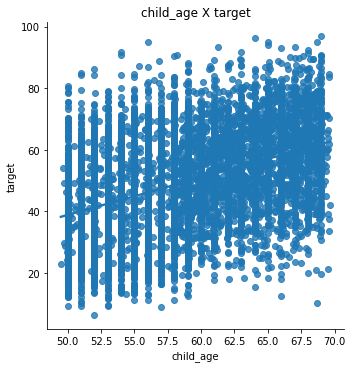

<Figure size 432x288 with 0 Axes>

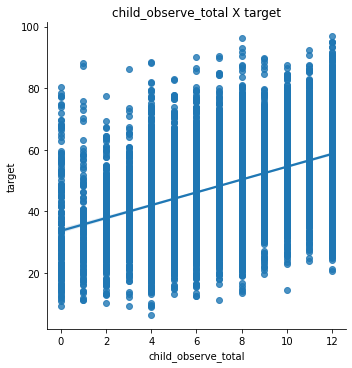

In [17]:
plt.figure()
sns.lmplot(data=df_train,x='child_age',y='target')
plt.title('child_age X target')
plt.figure()
sns.lmplot(data=df_train,x='child_observe_total',y='target')
plt.title('child_observe_total X target')


#df.id_dc_best.value_counts() ==df.dc_best.value_counts()
- we can drop all id_.._best and only use .._best because they provide the exact same distributions!

# ------------------------------------------------split df-----------------------------------------------------

In [18]:
df_train = df.iloc[:8584+1]
df_pred = df.iloc[8584+1:]
df_pred.reset_index(drop=True, inplace=True)

# ------------------------------------------------end split df-----------------------------------------------

# let'a try a model to see how things look

model1= RandomForestRegressor(random_state=0,
max_depth=4,
                              n_estimators= 40)
#model1=XGBRFRegressor()
from xgboost import XGBRFRegressor
model2= XGBRFRegressor(eval_metric='rmse',random_state=0,
                      colsample_bytree= 0.6,
                       learning_rate= 0.9700872583584363, max_depth= 4,
                       
                       n_estimators= 50, subsample= 0.97307396811264659)

In [65]:
df.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

from category_encoders.ordinal import OrdinalEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

In [195]:
def model_compute(model):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    pr_tr = model.predict(X_train)
    print(f'mean_squared_error_test : {mean_squared_error(y_test,pr,squared=False)}')
    print(f'mean_squared_error_train : {mean_squared_error(y_train,pr_tr,squared=False)}')
    return(pr)

encode_le(df)

In [196]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
le=LabelEncoder()

df1 = df_encoded.drop(drops,axis=1).copy()#we are trying df_encoded sometimes!WATCHOUT  .drop(drops,axis=1)

for col in df_encoded.select_dtypes('O').columns.tolist():
    df1[col] = le.fit_transform(df1[col].astype(str)).astype('int16')
    #df1[col]= robust_scale(df1[col])
    
#df1['target']=df_encoded['target']

In [197]:
df_train1 = df1.iloc[:8584+1]
df_pred1 = df1.iloc[8584+1:]
df_pred1.drop(['target'],axis=1,inplace=True)
df_pred1.reset_index(drop=True, inplace=True)

In [198]:
%%time
df_train1.fillna(0,inplace=True)
df_pred1.fillna(0,inplace=True)

CPU times: total: 141 ms
Wall time: 150 ms


In [199]:
from sklearn.model_selection import train_test_split
trainn,testt=train_test_split(df_train1,random_state=0,test_size=0.2)#best 

X_train=trainn.drop(['target'],axis=1)
X_test=testt.drop(['target'],axis=1)
y_train=trainn.target
y_test=testt.target


from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

X=np.array(df_train1.drop(['target'],axis=1))
y=np.array(df_train1.target)
#initialize the KFold object
kfold = KFold(n_splits=15, shuffle=True, random_state=42)

#loop over the folds
for train_idx, test_idx in kfold.split(X, y):
    # split the data into training and validation sets
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]


In [200]:
y_train

8004    48.529999
5445    44.480000
5932    15.300000
8322    74.830002
5300    47.779999
          ...    
4373    63.470001
7891    33.540001
4859    51.189999
3264    30.660000
2732    50.570000
Name: target, Length: 6868, dtype: float64

In [201]:

%%time
from sklearn.linear_model import Ridge,Lasso,GammaRegressor,LassoLarsCV,RidgeCV,ElasticNetCV,ARDRegression,BayesianRidge,LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


#model1= ExtraTreesRegressor(random_state=0,max_depth=5,n_estimators= 100)
model4= Lasso(alpha=0.01)
model2=LassoLarsCV(cv=20,max_iter=5000)#cv=50,max_iter=5000,verbose=True best ,min
from xgboost import XGBRFRegressor
#model4= XGBRFRegressor(learning_rate=8.009,max_depth=50,random_state=0)


CPU times: total: 0 ns
Wall time: 0 ns


In [202]:
%%time
model2=LassoLarsCV(cv=20,max_iter=5000)
pred2=model_compute(model2)#Lasso!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#cv=10:    9.71005287776152
#mean_squared_error_test : 9.678773266352836
#mean_squared_error_train : 8.991934793399988
#CPU times: total: 10min 12s
#Wall time: 2min 57s

mean_squared_error_test : 9.702028913584995
mean_squared_error_train : 9.100120876290196
CPU times: total: 7min 57s
Wall time: 2min 33s


In [203]:
pred2

array([42.54490406, 63.86464647, 32.28179231, ..., 61.11962639,
       42.17990968, 49.86827696])

alphas = [0.0001,0.001,0.1,0.00001]
MEAN_SQE=[]

for alpha in alphas:
    import time
    start_time = time.time()

    ridge=XGBRFRegressor(max_depth=20,learning_rate=alpha,random_state=0)
    ridge.fit(X_train, y_train)
    MEAN_SQE.append(mean_squared_error(ridge.predict(X_test),y_test,squared=False))
    end_time = time.time()
    print("Execution time:", end_time - start_time, "seconds")
ax = plt.gca()
ax.plot(alphas, MEAN_SQE)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("$MSE$ as a function of the regularization")
plt.show()


### lets visualise the top contributing features to our model2
top=pd.DataFrame(zip(X_train.columns, model2))
top[1]=top[1].abs()
hh=top.sort_values(ascending=True,by=1)[0].values

---------

In [204]:
model5= XGBRFRegressor(max_depth=50,random_state=0)
pred5=model_compute(model5)

mean_squared_error_test : 10.257001801755454
mean_squared_error_train : 2.15494000217448


In [205]:
pred4=model_compute(model4)

mean_squared_error_test : 9.729948898727491
mean_squared_error_train : 9.16849841445557


----------------------------------
# <span style="color:green">Ridge

In [207]:
le=LabelEncoder()

df13 = df_encoded_2.drop(drops,axis=1).copy()#we are trying df_encoded sometimes!WATCHOUT  .drop(drops,axis=1)

for col in df_encoded_2.select_dtypes('O').columns.tolist():
    df13[col] = le.fit_transform(df13[col].astype(str)).astype('int16')

df_train13 = df13.iloc[:8584+1]
df_pred13 = df13.iloc[8584+1:]
df_pred13.drop(['target'],axis=1,inplace=True)
df_pred13.reset_index(drop=True, inplace=True)


df_train13.fillna(0,inplace=True)
df_pred13.fillna(0,inplace=True)

from sklearn.model_selection import train_test_split
trainn,testt=train_test_split(df_train13,random_state=0,test_size=0.2)#best 

X_train=trainn.drop(['target'],axis=1)
X_test=testt.drop(['target'],axis=1)
y_train=trainn.target
y_test=testt.target


In [208]:
#should be computed with df_encoded_2

model3 = Ridge(alpha=8)#9.516197192701906
pred3=model_compute(model3)

mean_squared_error_test : 9.507958292632756
mean_squared_error_train : 8.137974769958898


In [209]:
pred3

array([42.63969704, 74.57892793, 27.47591918, ..., 59.87837468,
       41.22881564, 48.083196  ])

- compute these before the teacher overall change

In [210]:
le=LabelEncoder()

df16 = df_encoded_6.drop(drops,axis=1).copy()#we are trying df_encoded sometimes!WATCHOUT  .drop(drops,axis=1)

for col in df_encoded_6.select_dtypes('O').columns.tolist():
    df16[col] = le.fit_transform(df16[col].astype(str)).astype('int16')

df_train16 = df16.iloc[:8584+1]
df_pred16 = df16.iloc[8584+1:]
df_pred16.drop(['target'],axis=1,inplace=True)
df_pred16.reset_index(drop=True, inplace=True)


df_train16.fillna(0,inplace=True)
df_pred16.fillna(0,inplace=True)

from sklearn.model_selection import train_test_split
trainn,testt=train_test_split(df_train16,random_state=0,test_size=0.2)#best 

X_train=trainn.drop(['target'],axis=1)
X_test=testt.drop(['target'],axis=1)
y_train=trainn.target
y_test=testt.target

In [211]:
from sklearn.linear_model import OrthogonalMatchingPursuitCV

In [212]:
model6 =  OrthogonalMatchingPursuitCV()#alpha=10
pred6=model_compute(model6)
#mean_squared_error_test : 9.799052647247604 no params
#mean_squared_error_train : 9.268908792358063


mean_squared_error_test : 9.799042165711105
mean_squared_error_train : 9.268908933859754


In [213]:
from sklearn.linear_model import ElasticNet

In [214]:
model7 =  ElasticNet()#alpha=10
pred7=model_compute(model7)

mean_squared_error_test : 11.339901335303002
mean_squared_error_train : 11.424855832333453


In [215]:
pred7

array([45.69822571, 59.71421129, 32.05086607, ..., 60.8038392 ,
       42.14721043, 48.08053912])

# <span style="color:green">--------------------------------------------------

In [259]:
mean_squared_error(y_test,(2.8*pred3+0.01*pred7+0.5*pred4+1.2*pred5+pred6+0.5*pred2)/6.01,squared=False)#

9.335689816180189

- 2,1,1,1,1:9.374441741394895
- mean_squared_error(y_test,(2.5*pred3+0.01*pred7+0.5*pred4+pred5+pred6+pred2)/6.01,squared=False):9.3528478695869
- mean_squared_error(y_test,(3.2*pred3+1.4*pred5+1.7*pred6)/6.301,squared=False)##9.31923393140133

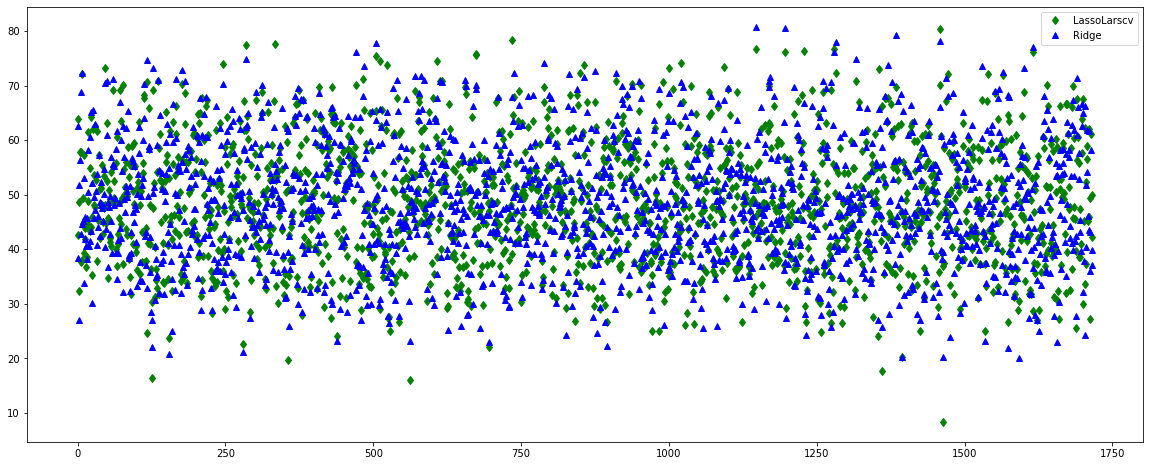

In [722]:
plt.figure(figsize=(20,8))
plt.plot(pred2, "gd", label="LassoLarscv")
plt.plot(pred5, "b^", label="Ridge")
plt.legend()

----

In [ ]:
X_test.iloc[[1]]

In [ ]:
# Preview top 5 predictors for the single/specific prediction
eli5.show_prediction(model1, X_test.iloc[1], feature_names=df_pred1.columns.tolist(), show_feature_values=True, top = 5)

In [ ]:
# We can get the top 15 features as a pandas dataframe
eli5.explain_prediction_df(estimator=model1, doc=X_test.iloc[1], top = 15)

# choose the final model you're going to compute with
- remember, you have to choose an accurate ,fast one
- !!XGboost isnt suitable for use

In [1147]:
df_pred16

,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,prov_best,dc_best,mn_best,ward_best,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_score_environment,pqa_score_assessment,pqa_score_relationships,pqa_score_curriculum,pqa_score_teaching,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,...,id_team_6.0,id_team_7.0,id_team_8.0,id_team_9.0,id_team_nan,2019,2020,2021,2022,Valeur_ajoute,ovserve_va,ovserve_va_sum,ovserve_dil,ovserve_dil_sum,ovserve_int,ovserve_int_sum,ovserve_att,ovserve_att_sum,ovserve_con,ovserve_va_con,obveserve_sum_mass,obveserve_sum_mass1,obveserve_sum_mass2,obveserve_sum_mass3,obveserve_sum_mass4,obveserve_sum_mass5,obveserve_sum_mass6,obveserve_sum_mass7,obveserve_sum_mass8,obveserve_sum_mass9,obveserve_sum_mass11,obveserve_sum_mass12,obveserve_sum_mass13,obveserve_sum_mass14,obveserve_sum_mass15,obveserve_sum_mass16,obveserve_sum_mass17,obveserve_sum_mass18,obveserve_sum_mass19,obveserve_sum_mass102,obveserve_sum_mass103,obveserve_sum_mass104,obveserve_sum_mass105,obveserve_sum_mass106,obveserve_sum_mass107,obveserve_sum_mass108,obveserve_sum_mass109,obveserve_sum_mass1002,obveserve_sum_mass1003,obveserve_sum_mass1004,obveserve_sum_mass1005,obveserve_sum_mass1006,obveserve_sum_mass1007,obveserve_sum_mass1008,obveserve_sum_mass1009
0,88,57.000000,NaN,NaN,3,2.0,108.0,10,5,10,10,11.0,0,2016.0,0.038152,0.0,2,NaN,25,0,4,6,110,8.0,42,0,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,1,1,1,0,0,3,3,1,1,3,0,1,3,...,0,0,0,0,0,0,0,1,0,330,121.0,22.0,100,20,100,20,100,20,25,10,538.0,2662.0,2200.0,2000,2000,2000,2000,2000,500,250,-31706.91018,24981.20196,-25621.7456,25621.7456,-25621.7456,25621.74560,-25621.74560,1601.35910,-4804.07730,15.588457,11.916375,14.832397,11.832160,14.832397,11.832160,12.041595,7.416198,266200.0,44000.0,200000,40000,200000,40000,50000,5000
1,110,54.000000,2021.0,9.0,3,1.0,105.0,10,10,5,10,11.0,0,2017.0,-0.259006,0.0,2,NaN,25,0,3,1,98,21.0,42,0,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,0,2,30,0,0,0,0,1,0,0,0,0,0,3,1,0,3,...,0,1,0,0,0,0,0,1,0,260,121.0,22.0,25,10,100,20,100,20,100,20,538.0,2662.0,550.0,250,1000,2000,2000,2000,2000,2000,-26422.42680,800.67960,-4003.3980,24020.3880,-21351.4560,21351.45600,-21351.45600,21351.45600,-21351.45600,12.961481,7.549834,11.618950,11.401754,14.832397,11.832160,14.832397,11.832160,66550.0,5500.0,25000,20000,200000,40000,200000,40000
2,43,57.000000,NaN,NaN,3,NaN,101.5,5,5,5,5,8.0,1,2016.0,-1.507299,0.0,2,NaN,25,0,5,13,103,20.0,42,0,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,4,3,15,1,0,0,0,1,0,1,0,1,0,3,3,3,1,...,0,0,0,0,1,0,0,1,0,200,64.0,16.0,25,10,25,10,25,10,25,10,220.0,1024.0,400.0,250,250,250,250,250,250,250,-23059.56960,4323.66930,-7206.1155,7206.1155,-7206.1155,7206.11550,-7206.11550,7206.11550,-7206.11550,10.246951,7.141428,7.745967,6.708204,7.745967,6.708204,7.745967,6.708204,25600.0,4000.0,6250,2500,6250,2500,6250,2500
3,205,59.334702,NaN,NaN,4,3.0,NaN,10,10,10,5,11.0,0,2017.0,NaN,NaN,1,5.0,15,0,1,50,150,NaN,42,0,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,0,0,28,0,0,0,1,0,0,1,0,0,1,0,0,3,3,...,0,0,0,0,1,0,0,0,1,310,121.0,22.0,100,20,25,10,100,20,100,20,538.0,2662.0,2200.0,2000,500,250,1000,2000,2000,2000,-12870.00000,10140.00000,-10400.0000,650.0000,-1950.0000,11700.00000,-10400.00000,10400.00000,-10400.00000,15.588457,11.916375,12.041595,7.416198,11.618950,11.401754,14.832397,11.832160,266200.0,44000.0,50000,5000,25000,20000,200000,40000
4,103,54.000000,2021.0,8

In [ ]:
#2.8*pred3+ 0.01*pred7+ 0.5*pred4+ 1.2*pred5+ pred6+ 0.5*pred2)/6.01

In [268]:
preds=(2.8*model3.predict(df_pred13)+1.2*model5.predict(df_pred1)+0.01*model7.predict(df_pred16)
      +0.5*model2.predict(df_pred1))/4.51

In [269]:
preds.shape

(3680,)

In [270]:
test.shape[0]

3680

In [735]:
# Get the top 15 features for each predictions
top_predictors = []
for i in range(test.shape[0]):
    print(f'{i}/n')
    predictors = eli5.explain_prediction_df(estimator=model2, doc=df_pred1[df_pred1.columns.tolist()].iloc[i], top = 15)
    top_predictors.append(predictors.feature.tolist())

0/n
1/n
2/n
3/n
4/n
5/n
6/n
7/n
8/n
9/n
10/n
11/n
12/n
13/n
14/n
15/n
16/n
17/n
18/n
19/n
20/n
21/n
22/n
23/n
24/n
25/n
26/n
27/n
28/n
29/n
30/n
31/n
32/n
33/n
34/n
35/n
36/n
37/n
38/n
39/n
40/n
41/n
42/n
43/n
44/n
45/n
46/n
47/n
48/n
49/n
50/n
51/n
52/n
53/n
54/n
55/n
56/n
57/n
58/n
59/n
60/n
61/n
62/n
63/n
64/n
65/n
66/n
67/n
68/n
69/n
70/n
71/n
72/n
73/n
74/n
75/n
76/n
77/n
78/n
79/n
80/n
81/n
82/n
83/n
84/n
85/n
86/n
87/n
88/n
89/n
90/n
91/n
92/n
93/n
94/n
95/n
96/n
97/n
98/n
99/n
100/n
101/n
102/n
103/n
104/n
105/n
106/n
107/n
108/n
109/n
110/n
111/n
112/n
113/n
114/n
115/n
116/n
117/n
118/n
119/n
120/n
121/n
122/n
123/n
124/n
125/n
126/n
127/n
128/n
129/n
130/n
131/n
132/n
133/n
134/n
135/n
136/n
137/n
138/n
139/n
140/n
141/n
142/n
143/n
144/n
145/n
146/n
147/n
148/n
149/n
150/n
151/n
152/n
153/n
154/n
155/n
156/n
157/n
158/n
159/n
160/n
161/n
162/n
163/n
164/n
165/n
166/n
167/n
168/n
169/n
170/n
171/n
172/n
173/n
174/n
175/n
176/n
177/n
178/n
179/n
180/n
181/n
182/n
183/n
184/n


KeyboardInterrupt: 

In [167]:
# Submission file preparation
predictors = pd.DataFrame(top_predictors, columns = ['feature_' + str(i) for i in range(1,16)])
#predictors.drop(['feature_0'],axis=1,inplace=True)
#predictors

In [168]:
predictors['target'] = preds
predictors['child_id'] = test.child_id
predictors = predictors[ss.columns.tolist()]
predictors.head()

,child_id,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,ID_0I0999N6S,60.060314,<BIAS>,child_age,teacher_emotional_total,child_observe_total,pra_cohort_1,pra_shape,child_date,pri_money_97,obs_hazard_3,pqa_teaching_participation,teacher_selfcare_total,pra_training_3,pri_food_parents_lunch,language_match,data_year
1,ID_GQ6ONJ4FP,41.928455,<BIAS>,child_age,teacher_emotional_total,child_observe_total,pra_cohort_1,child_date,pra_shape,count_staff_all,language_child,teacher_selfcare_total,count_staff_time_full,pra_training_3,pri_food_parents_lunch,language_match,data_year
2,ID_YZ76CVRW3,44.963379,<BIAS>,child_age,child_observe_total,pra_cohort_1,pra_shape,teacher_selfcare_met,language_child,pri_money_97,longitude,obs_hazard_3,pqa_teaching_participation,pra_training_3,pri_food_parents_lunch,language_match,data_year
3,ID_BNINCRXH8,62.402859,<BIAS>,child_age,child_observe_total,teacher_emotional_total,child_date,count_staff_all,pra_cohort_1,pra_shape,language_child,obs_equipment__1,pra_training_3,pri_food_parents_lunch,count_staff_time_full,language_match,data_year
4,ID_1U7GDTLRI,40.047817,<BIAS>,child_age,child_observe_total,teacher_emotional_total,pra_cohort_1,pra_shape,child_date,pri_money_97,obs_hazard_3,pqa_teaching_participation,obs_equipment__1,pra_training_3,pri_food_parents_lunch,language_match,data_year


In [271]:
preds

array([57.87472401, 45.5848016 , 50.39650441, ..., 44.03438518,
       41.84595029, 38.4276049 ])

In [272]:
sub=pd.read_csv('BaselineSubmission.csv')

In [273]:
sub['target']=preds

In [274]:
sub.to_csv('BaselineSubmissionSpecial.csv', index = False)


In [131]:
# Create csv to upload to Zindi for scoring
predictors.to_csv('BaselineSubmission.csv', index = False)

NameError: name 'predictors' is not defined

------
let's explore some of our data
--------

In [18]:
df

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,...,count_staff_paid_practitioners,count_staff_paid_assistants,count_staff_paid_cooks,count_staff_paid_maintenance,count_staff_paid_managers,count_staff_paid_support,count_staff_paid,count_practitioners_all,count_practitioners_age_0,count_practitioners_age_1,count_practitioners_age_2,count_practitioners_age_3,count_practitioners_age_4,count_practitioners_age_5,count_practitioners_age_6,health,practitioner,plan,language_child,language_assessment,facility_type,sef_ind,language_match,elp_ind,gps_ind,pre_covid,ses_proxy,quintile_used,id_facility_n,id_ward_n,id_mn_n,id_dc_n,id_prov_n,ses_cat,obs_lighting_1,obs_lighting_2,obs_lighting_3,obs_lighting_4,obs_lighting_5,obs_lighting_6,obs_lighting_8,obs_cooking_1,obs_cooking_2,obs_cooking_3,obs_cooking_4,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target
0,ID_SYSJ2FM0D,2022.0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,Sometimes,Sometimes,Sometimes,Sometimes,4.0,Female,2017-02-06,NaN,NaN,NaN,NaN,NaN,50-59 months,GT421,GAUTENG,DC42,SEDIBENG,EMFULENI,39.0,20005.0,761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sesotho,Sesotho,Grade R,Yes,1.0,No,Yes,Post COVID,2.0,Yes,7.0,14.0,107.0,134.0,1051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.500000
1,ID_J5BTFOZR3,2019.0,NaN,60.163933,NaN,NaN,NaN,1st year in the programme,103.000000,Sometimes,Almost never,Sometimes,Often,4.0,Female,NaN,-1.356791,Normal,NaN,NaN,NaN,60-69 months,NaN,KWAZULU-NATAL,DC22,UMGUNGUNDLOVU,NaN,NaN,NaN,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isiZulu,isiZulu,NaN,Yes,1.0,No,No,Pre-COVID,4.0,Yes,24.0,NaN,NaN,367.0,1832.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.869999
2,ID_R00SN7AUD,2022.0,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,Often,Often,Sometimes,Often,7.0,Male,2016-05-24,-1.250863,Normal,NaN,NaN,NaN,60-69 months,CPT,WESTERN CAPE,CPT,CITY OF CAPE TOWN,CITY OF CAPE TOWN,85.0,20001.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afrikaans,Afrikaans,Grade R,No,1.0,Yes,Yes,Post COVID,1.0,No,8.0,24.0,1448.0,1448.0,3214.0,R0-110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.520000
3,ID_BSSK60PAZ,2021.0,2021-10-13,53.000000,2020-01-15,20.0,No,1st year in the programme,98.099998,Almost always,Almost always,Sometimes,Often,9.0,Male,2017-05-08,-1.830364,Normal,NaN,NaN,NaN,50-59 months,WC025,WESTERN CAPE,DC2,CAPE WINELANDS,BREEDE VALLEY,18.0,2689.0,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,

In [19]:
df_train.child_years_in_programme.value_counts()

1st year in the programme    4369
2nd year in programme        1917
3rd year in programme        1485
Do Not Know                   108
Name: child_years_in_programme, dtype: int64

- let's see if the year of child has an impact on our target


In [20]:
df.select_dtypes('object')

,child_id,child_date,child_enrolment_date,child_grant,child_years_in_programme,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_gender,child_dob,child_stunted,child_attends,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_assessment_observation,pqa_assessment_systematic,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,...,obs_access_disability_5,obs_access_disability_6,obs_access_disability_0,obs_safety,obs_safety_1,obs_safety_2,obs_safety_3,obs_safety_4,obs_safety_5,obs_safety_6,obs_safety_7,obs_safety_8,obs_safety_9,obs_safety_10,obs_safety_0,obs_menu_display,obs_menu_compliance,obs_menu_same,obs_material_display,obs_hazard,obs_hazard_1,obs_hazard_2,obs_hazard_3,obs_hazard_4,obs_hazard_5,obs_hazard_6,obs_hazard_7,obs_hazard_8,obs_hazard_97,obs_hazard_0,obs_fencing_play_area,id_prov,gps,grade_r,professionals_practitioners,certificate_registration_partial,certificate_registration_program,certificate_registration_npo,certificate_register,census,urban,phase_natemis,obs_access_disability,health,practitioner,plan,language_child,language_assessment,facility_type,sef_ind,elp_ind,gps_ind,pre_covid,quintile_used,ses_cat
0,ID_SYSJ2FM0D,2022-02-03,NaN,NaN,NaN,Sometimes,Sometimes,Sometimes,Sometimes,Female,2017-02-06,NaN,NaN,NaN,50-59 months,GT421,GAUTENG,DC42,SEDIBENG,EMFULENI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GT,-26.5510481 27.8798236,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,Sesotho,Sesotho,Grade R,Yes,No,Yes,Post COVID,Yes,NaN
1,ID_J5BTFOZR3,NaN,NaN,NaN,1st year in the programme,Sometimes,Almost never,Sometimes,Often,Female,NaN,Normal,NaN,NaN,60-69 months,NaN,KWAZULU-NATAL,DC22,UMGUNGUNDLOVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Urban,NaN,NaN,NaN,NaN,NaN,isiZulu,isiZulu,NaN,Yes,No,No,Pre-COVID,Yes,NaN
2,ID_R00SN7AUD,2022-03-11,NaN,NaN,NaN,Often,Often,Sometimes,Often,Male,2016-05-24,Normal,NaN,NaN,60-69 months,CPT,WESTERN CAPE,CPT,CITY OF CAPE TOWN,CITY OF CAPE TOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,Afrikaans,Afrikaans,Grade R,No,Yes,Yes,Post COVID,No,R0-110
3,ID_BSSK60PAZ,2021-10-13,2020-01-15,No,1st year in the programme,Almost always,Almost always,Sometimes,Often,Male,2017-05-08,Normal,NaN,NaN,50-59 months,WC025,WESTERN CAPE,DC2,CAPE WINELANDS,BREEDE VALLEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up to 1 hour,Up to 1 hour,4 5,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### child_observe_ columns encodage:

In [21]:
col_1=df.columns[df.columns.str.startswith('child_observe_')]

In [22]:
for col in col_1:    
    print(df[col].unique())

['Sometimes' 'Often' 'Almost always' 'Almost never']
['Sometimes' 'Almost never' 'Often' 'Almost always']
['Sometimes' 'Almost always' 'Often' 'Almost never']
['Sometimes' 'Often' 'Almost always' 'Almost never']
[ 4.  7.  9. 12.  8. 10. 11.  5. nan  6.  2.  3.  1.  0.]


In [23]:
scatter={'Sometimes':3,'Often':5,'Almost always':10,'Almost never':0}

In [24]:
#scatter={3:'Sometimes',5:'Often',10:'Almost always',0:'Almost never'}
#df_encoded[col_1]=df_encoded[col_1].replace(scatter)

In [25]:
df[col_1]=df[col_1].replace(scatter)

In [26]:
df[col_1]

,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total
0,3,3,3,3,4.0
1,3,0,3,5,4.0
2,5,5,3,5,7.0
3,10,10,3,5,9.0
4,10,10,10,10,12.0
...,...,...,...,...,...
12260,5,5,3,10,8.0
12261,3,3,3,3,4.0
12262,10,10,10,10,12.0
12263,3,3,0,0,2.0


--------------
- child_years_in_programme

In [27]:
df['child_years_in_programme'].unique()

array([nan, '1st year in the programme', '2nd year in programme',
       '3rd year in programme', 'Do Not Know'], dtype=object)

In [28]:
scapper1={'1st year in the programme':1,'Do Not Know':1,'2nd year in programme':2,'3rd year in programme':3}
df['child_years_in_programme']=df['child_years_in_programme'].replace(scapper1)

In [29]:
df.child_years_in_programme

0        NaN
1        1.0
2        NaN
3        1.0
4        2.0
        ... 
12260    2.0
12261    1.0
12262    1.0
12263    1.0
12264    1.0
Name: child_years_in_programme, Length: 12265, dtype: float64

In [30]:
df

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,...,count_staff_paid_practitioners,count_staff_paid_assistants,count_staff_paid_cooks,count_staff_paid_maintenance,count_staff_paid_managers,count_staff_paid_support,count_staff_paid,count_practitioners_all,count_practitioners_age_0,count_practitioners_age_1,count_practitioners_age_2,count_practitioners_age_3,count_practitioners_age_4,count_practitioners_age_5,count_practitioners_age_6,health,practitioner,plan,language_child,language_assessment,facility_type,sef_ind,language_match,elp_ind,gps_ind,pre_covid,ses_proxy,quintile_used,id_facility_n,id_ward_n,id_mn_n,id_dc_n,id_prov_n,ses_cat,obs_lighting_1,obs_lighting_2,obs_lighting_3,obs_lighting_4,obs_lighting_5,obs_lighting_6,obs_lighting_8,obs_cooking_1,obs_cooking_2,obs_cooking_3,obs_cooking_4,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target
0,ID_SYSJ2FM0D,2022.0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,3,3,3,3,4.0,Female,2017-02-06,NaN,NaN,NaN,NaN,NaN,50-59 months,GT421,GAUTENG,DC42,SEDIBENG,EMFULENI,39.0,20005.0,761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sesotho,Sesotho,Grade R,Yes,1.0,No,Yes,Post COVID,2.0,Yes,7.0,14.0,107.0,134.0,1051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.500000
1,ID_J5BTFOZR3,2019.0,NaN,60.163933,NaN,NaN,NaN,1.0,103.000000,3,0,3,5,4.0,Female,NaN,-1.356791,Normal,NaN,NaN,NaN,60-69 months,NaN,KWAZULU-NATAL,DC22,UMGUNGUNDLOVU,NaN,NaN,NaN,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isiZulu,isiZulu,NaN,Yes,1.0,No,No,Pre-COVID,4.0,Yes,24.0,NaN,NaN,367.0,1832.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.869999
2,ID_R00SN7AUD,2022.0,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,5,5,3,5,7.0,Male,2016-05-24,-1.250863,Normal,NaN,NaN,NaN,60-69 months,CPT,WESTERN CAPE,CPT,CITY OF CAPE TOWN,CITY OF CAPE TOWN,85.0,20001.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afrikaans,Afrikaans,Grade R,No,1.0,Yes,Yes,Post COVID,1.0,No,8.0,24.0,1448.0,1448.0,3214.0,R0-110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.520000
3,ID_BSSK60PAZ,2021.0,2021-10-13,53.000000,2020-01-15,20.0,No,1.0,98.099998,10,10,3,5,9.0,Male,2017-05-08,-1.830364,Normal,NaN,NaN,NaN,50-59 months,WC025,WESTERN CAPE,DC2,CAPE WINELANDS,BREEDE VALLEY,18.0,2689.0,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isiXhosa,isiXhosa,NaN,Yes,1.0,Yes,Yes,Post COVID,3.0,No,4.0,22.0,76.0,629.0,3214.0,R291-7

### pqa_ columns OHE

In [31]:
df['pqa_environment_areas'].unique()

array([nan,
       '<b>Good:</b> There are four or more learning areas arranged so children can use them, quiet and active areas separate.',
       '<b>Basic:</b> Three learning areas set out for children to play in (alone or with other children).',
       '<b>Inadequate:</b> There are no or fewer than three organised learning areas.'],
      dtype=object)

In [32]:
cols_pqa=df.columns[df.columns.str.startswith('pqa')].tolist()

In [33]:
for col_pqa in cols_pqa:
    print(f'{col_pqa}   :\n {df[col_pqa].unique()} \n\n\n')

pqa_date   :
 [nan '2021-10-29' '2021-10-15' '2021-10-28' '2021-11-02' '2021-11-08'
 '2021-09-22' '2021-10-22' '2021-10-11' '2021-10-01' '2021-10-26'
 '2021-10-19' '2021-11-12' '2021-11-11' '2021-10-25' '2021-11-03'
 '2021-10-20' '2021-10-12' '2021-10-21' '2021-09-23' '2021-11-09'
 '2021-11-04' '2021-10-07' '2021-09-21' '2021-09-28' '2021-09-20'
 '2021-10-13' '2021-10-14' '2021-10-18' '2021-09-30' '2021-10-04'
 '2021-11-10' '2021-09-27' '2021-09-29' '2021-11-15' '2021-11-16'
 '2021-11-05' '2021-10-06' '2021-10-05' '2021-10-27' '2021-10-08'
 '2021-11-18' '2021-11-17'] 



pqa_class_age   :
 [nan '4 5' '3 4' '3 4 5' '4 5 6' '4' '2 3 4 5' '1 2 3 4' '3 5' '1 2 3 4 5'
 '1 2 3 4 5 6' '2 3 4' '2 3' '1 5' '5' '2 3 4 5 6' '3 4 5 6'] 



pqa_class_age_1   :
 [nan 'No' 'Yes'] 



pqa_class_age_2   :
 [nan 'No' 'Yes'] 



pqa_class_age_3   :
 [nan 'No' 'Yes'] 



pqa_class_age_4   :
 [nan 'Yes' 'No'] 



pqa_class_age_5   :
 [nan 'Yes' 'No'] 



pqa_class_age_6   :
 [nan 'No' 'Yes'] 



pqa_class_

- we are only in interested in encoding colmuns with good/basic/inadequate uniques
        - we drop :['pqa_score_teaching','pqa_score_curriculum','pqa_score_relationships','pqa_score_relationships','pqa_score_assessment','pqa_score_environment',pqa_class_assistants,pqa_class_age_6,pqa_class_age_5,pqa_class_age_4,pqa_class_age_3,pqa_class_age_2,pqa_class_age_1,pqa_class_age,pqa_date]

In [34]:
for x in ['pqa_score_teaching','pqa_score_curriculum','pqa_score_relationships','pqa_score_assessment','pqa_score_environment','pqa_class_assistants','pqa_class_age_6','pqa_class_age_5','pqa_class_age_4','pqa_class_age_3','pqa_class_age_2','pqa_class_age_1','pqa_class_age','pqa_date']:
    cols_pqa.remove(x)


In [35]:
df_train = df.iloc[:8584+1]
df_pred = df.iloc[8584+1:]
df_pred.reset_index(drop=True, inplace=True)

In [36]:
for col in df_train.columns :    
    print(f'{col :-<50}{df_train[col].isna().sum()/df_train.shape[0]}')

child_id------------------------------------------0.0
data_year-----------------------------------------0.0
child_date----------------------------------------0.21211415259172975
child_age-----------------------------------------0.0
child_enrolment_date------------------------------0.6947000582411182
child_months_enrolment----------------------------0.6947000582411182
child_grant---------------------------------------0.36493884682585903
child_years_in_programme--------------------------0.08223645894001165
child_height--------------------------------------0.18823529411764706
child_observe_attentive---------------------------0.0
child_observe_concentrated------------------------0.0
child_observe_diligent----------------------------0.0
child_observe_interested--------------------------0.0
child_observe_total-------------------------------0.08177052999417589
child_gender--------------------------------------0.0
child_dob-----------------------------------------0.16959813628421666
child_zha-

pra_qualification_7-------------------------------0.809668025626092
pra_qualification_97------------------------------0.809668025626092
pra_qualification_0-------------------------------0.809668025626092
pra_previous--------------------------------------0.809668025626092
pra_ncf_training----------------------------------0.809668025626092
pra_ncf_trainer-----------------------------------0.8874781595806639
pra_ncf_trainer_1---------------------------------0.8874781595806639
pra_ncf_trainer_2---------------------------------0.8874781595806639
pra_ncf_trainer_3---------------------------------0.8874781595806639
pra_ncf_trainer_4---------------------------------0.8874781595806639
pra_ncf_trainer_5---------------------------------0.8874781595806639
pra_ncf_trainer_97--------------------------------0.8874781595806639
pra_learnership-----------------------------------0.809668025626092
pra_training--------------------------------------0.809668025626092
pra_training_1---------------------------

pri_covid_awareness_2-----------------------------0.8103669190448457
pri_covid_awareness_3-----------------------------0.8103669190448457
pri_covid_awareness_4-----------------------------0.8103669190448457
pri_covid_awareness_97----------------------------0.8103669190448457
pri_covid_precautions-----------------------------0.8103669190448457
pri_covid_precautions_1---------------------------0.8103669190448457
pri_covid_precautions_2---------------------------0.8103669190448457
pri_covid_precautions_3---------------------------0.8103669190448457
pri_covid_precautions_4---------------------------0.8103669190448457
pri_covid_precautions_5---------------------------0.8103669190448457
pri_covid_precautions_6---------------------------0.8103669190448457
pri_covid_precautions_97--------------------------0.8103669190448457
pri_food_parents_breakfast------------------------0.8103669190448457
pri_food_parents_morning--------------------------0.8103669190448457
pri_food_parents_lunch------------

count_practitioners_age_3-------------------------0.8103669190448457
count_practitioners_age_4-------------------------0.8103669190448457
count_practitioners_age_5-------------------------0.8103669190448457
count_practitioners_age_6-------------------------0.8103669190448457
health--------------------------------------------0.8103669190448457
practitioner--------------------------------------0.809668025626092
plan----------------------------------------------0.809668025626092
language_child------------------------------------0.17973209085614444
language_assessment-------------------------------0.0
facility_type-------------------------------------0.6031450203843913
sef_ind-------------------------------------------0.0
language_match------------------------------------0.007221898660454281
elp_ind-------------------------------------------0.17973209085614444
gps_ind-------------------------------------------0.10075713453698311
pre_covid-----------------------------------------0.0
ses_pro

In [37]:
(df_train[cols_pqa].isna().sum()/df_train.shape[0]).sort_values(ascending=False).unique()

array([0.8341293 , 0.82877111, 0.8262085 , 0.82550961, 0.82516016,
       0.82422831, 0.82411182, 0.81956902, 0.81735585, 0.81001747])

W notice a huge amount of nul vals
i suggest combining all of them in one column then dropping them

In [38]:
df = pd.concat((df_train,df_pred),axis=0,ignore_index=True) # we concated the two dfs

In [39]:
from random import randint

In [40]:
for col in cols_pqa:
    df[col] = df[col].apply(lambda x: 1 if str(x).startswith('<b>Basic') else (2 if str(x).startswith('<b>Good') else (0 if str(x).startswith('<b>Inadequate') else (randint(0,1) if pd.isna(x) else x))))
    

In [41]:
df[cols_pqa]

,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_assessment_observation,pqa_assessment_systematic,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support
0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,1,1
1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0
2,0,0,1,1,0,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0
3,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,1,0
4,2,0,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,0,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1
12261,0,0,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,1,1,1,1
12262,1,1,1,1,0,0,1,1,1,2,1,1,0,1,1,1,1,1,1,1,1,0
12263,1,1,2,2,1,1,2,1,2,2,2,2,1,1,2,1,1,2,2,1,1,1


In [42]:
df['pqa_total']=df[cols_pqa].sum(axis=1)

In [43]:
df['pqa_total'].value_counts()

11    1649
12    1613
10    1511
9     1229
13    1228
14     871
8      772
15     485
7      409
16     249
6      199
24     155
22     145
21     143
17     142
25     133
18     131
19     128
26     123
23     118
20      94
27      93
29      74
5       69
30      66
28      60
32      56
31      47
33      43
37      42
34      36
39      31
35      30
4       27
36      24
44      12
2        6
40       5
38       5
0        4
3        4
41       4
Name: pqa_total, dtype: int64

In [44]:
df.drop(cols_pqa,axis=1,inplace=True)

In [45]:
df[['pqa_total','target']].corr()['target']

pqa_total   -0.078187
target       1.000000
Name: target, dtype: float64

In [46]:
df

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_score_environment,pqa_score_assessment,pqa_score_relationships,pqa_score_curriculum,pqa_score_teaching,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,...,count_staff_paid_assistants,count_staff_paid_cooks,count_staff_paid_maintenance,count_staff_paid_managers,count_staff_paid_support,count_staff_paid,count_practitioners_all,count_practitioners_age_0,count_practitioners_age_1,count_practitioners_age_2,count_practitioners_age_3,count_practitioners_age_4,count_practitioners_age_5,count_practitioners_age_6,health,practitioner,plan,language_child,language_assessment,facility_type,sef_ind,language_match,elp_ind,gps_ind,pre_covid,ses_proxy,quintile_used,id_facility_n,id_ward_n,id_mn_n,id_dc_n,id_prov_n,ses_cat,obs_lighting_1,obs_lighting_2,obs_lighting_3,obs_lighting_4,obs_lighting_5,obs_lighting_6,obs_lighting_8,obs_cooking_1,obs_cooking_2,obs_cooking_3,obs_cooking_4,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target,pqa_total
0,ID_SYSJ2FM0D,2022.0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,3,3,3,3,4.0,Female,2017-02-06,NaN,NaN,NaN,NaN,NaN,50-59 months,GT421,GAUTENG,DC42,SEDIBENG,EMFULENI,39.0,20005.0,761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sesotho,Sesotho,Grade R,Yes,1.0,No,Yes,Post COVID,2.0,Yes,7.0,14.0,107.0,134.0,1051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.500000,15
1,ID_J5BTFOZR3,2019.0,NaN,60.163933,NaN,NaN,NaN,1.0,103.000000,3,0,3,5,4.0,Female,NaN,-1.356791,Normal,NaN,NaN,NaN,60-69 months,NaN,KWAZULU-NATAL,DC22,UMGUNGUNDLOVU,NaN,NaN,NaN,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isiZulu,isiZulu,NaN,Yes,1.0,No,No,Pre-COVID,4.0,Yes,24.0,NaN,NaN,367.0,1832.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.869999,13
2,ID_R00SN7AUD,2022.0,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,5,5,3,5,7.0,Male,2016-05-24,-1.250863,Normal,NaN,NaN,NaN,60-69 months,CPT,WESTERN CAPE,CPT,CITY OF CAPE TOWN,CITY OF CAPE TOWN,85.0,20001.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afrikaans,Afrikaans,Grade R,No,1.0,Yes,Yes,Post COVID,1.0,No,8.0,24.0,1448.0,1448.0,3214.0,R0-110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.520000,11
3,ID_BSSK60PAZ,2021.0,2021-10-13,53.000000,2020-01-15,20.0,No,1.0,98.099998,10,10,3,5,9.0,Male,2017-05-08,-1.830364,Normal,NaN,NaN,NaN,50-59 months,WC025,WESTERN CAPE,DC2,CAPE WINELANDS,BREEDE VALLEY,18.0,2689.0,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up to 1 hour,Up to 1 hour,4 5,No,No,No,Yes,Yes,Sometime,Practitioner,Both,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isiXhosa,isiXhosa,NaN,Yes,1.0,Yes,Yes,Post COVID,3.0,No,4.0,22.0,76.0,629.0,3214.0,R291-750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.599998,9
4,ID_IZTY

lets drops the useless columns containing the number of people and one hot encode the ids

In [47]:
df.drop(['child_id'],axis=1,inplace=True)

In [48]:
df.drop(df.columns[(df.columns.str.startswith('id')) & (df.columns.str.endswith('_n'))],axis=1,inplace=True)

In [49]:
df.columns[df.columns.str.startswith('id')]

Index(['id_mn_best', 'id_dc_best', 'id_enumerator', 'id_facility', 'id_ward',
       'id_prov', 'id_team'],
      dtype='object')

In [50]:
for i in df.columns[df.columns.str.startswith('id')]:
    print(f'{i :-<50} {len(df[i].unique())}')

id_mn_best---------------------------------------- 154
id_dc_best---------------------------------------- 51
id_enumerator------------------------------------- 215
id_facility--------------------------------------- 2128
id_ward------------------------------------------- 593
id_prov------------------------------------------- 10
id_team------------------------------------------- 19


In [51]:
df[df.duplicated()]

,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_score_environment,pqa_score_assessment,pqa_score_relationships,pqa_score_curriculum,pqa_score_teaching,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,...,count_staff_contract_permanent,count_staff_contract_temporary,count_staff_contract_substitute,count_staff_time_part,count_staff_paid_practitioners,count_staff_paid_assistants,count_staff_paid_cooks,count_staff_paid_maintenance,count_staff_paid_managers,count_staff_paid_support,count_staff_paid,count_practitioners_all,count_practitioners_age_0,count_practitioners_age_1,count_practitioners_age_2,count_practitioners_age_3,count_practitioners_age_4,count_practitioners_age_5,count_practitioners_age_6,health,practitioner,plan,language_child,language_assessment,facility_type,sef_ind,language_match,elp_ind,gps_ind,pre_covid,ses_proxy,quintile_used,ses_cat,obs_lighting_1,obs_lighting_2,obs_lighting_3,obs_lighting_4,obs_lighting_5,obs_lighting_6,obs_lighting_8,obs_cooking_1,obs_cooking_2,obs_cooking_3,obs_cooking_4,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target,pqa_total
3926,2021.0,2021-10-20,55.0,2020-11-20,10.0,No,2.0,107.5,10,10,10,10,12.0,Female,2017-03-08,0.168476,Normal,NaN,NaN,NaN,50-59 months,FS185,FREE STATE,DC18,LEJWELEPUTSWA,NALA,10.0,755.0,1359.0,2021-10-20,4 5,No,No,No,Yes,Yes,No,1.0,11.0,3.0,7.0,10.0,8.0,Up to 1 hour,Up to 2 hours,4 5,No,No,No,Yes,Yes,Often,Both,Child,Child,...,23.0,0.0,0.0,0.0,10.0,4.0,3.0,3.0,1.0,2.0,23.0,1.0,0.0,0.0,4.0,3.0,1.0,1.0,1.0,4,Yes,"Yes, details provided for the main activities ...",English,English,NaN,Yes,1.0,Yes,Yes,Post COVID,3.0,No,R291-750,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,59.299999,39


df.drop(['id_mn_best','id_dc_best','id_enumerator','id_facility','id_ward','id_prov',])

-------------------------
- check columns


In [52]:
df['id_facility'].value_counts()[df['id_facility'].value_counts()<5]

103.0     4
379.0     4
1490.0    4
1975.0    4
1827.0    4
         ..
1154.0    1
914.0     1
2080.0    1
1635.0    1
1576.0    1
Name: id_facility, Length: 1298, dtype: int64

---------------

In [53]:
siglevas = df['id_facility'].value_counts()[df['id_facility'].value_counts()<3]

df['id_facility']= df['id_facility'].apply(lambda x : 0.00 if x in siglevas else x)

df['id_facility'][df['id_facility']==0.0]

4        0.0
14       0.0
64       0.0
111      0.0
143      0.0
        ... 
12168    0.0
12170    0.0
12186    0.0
12220    0.0
12261    0.0
Name: id_facility, Length: 362, dtype: float64

In [54]:
sg= df['id_ward'].value_counts()[df['id_ward'].value_counts()<3]

df['id_ward']= df['id_ward'].apply(lambda x : 0.00 if x in sg else x)

df['id_ward'][df['id_ward']==0.0]

402      0.0
2175     0.0
2210     0.0
2338     0.0
2925     0.0
3372     0.0
3645     0.0
4180     0.0
4824     0.0
5344     0.0
6309     0.0
7121     0.0
7156     0.0
7334     0.0
7831     0.0
8625     0.0
8710     0.0
8840     0.0
9331     0.0
9461     0.0
9954     0.0
10240    0.0
10658    0.0
11000    0.0
12139    0.0
Name: id_ward, dtype: float64

In [55]:
siglevas = df['id_enumerator'].value_counts()[df['id_enumerator'].value_counts()<3]

df['id_enumerator']= df['id_enumerator'].apply(lambda x : 0.00 if x in siglevas else x)

df['id_enumerator'][df['id_enumerator']==0.0]

1105     0.0
1270     0.0
1867     0.0
1939     0.0
2008     0.0
2696     0.0
2904     0.0
3386     0.0
5148     0.0
6061     0.0
8847     0.0
9004     0.0
9214     0.0
10362    0.0
Name: id_enumerator, dtype: float64

---------

In [56]:
# Select columns that start with 'id'
id_cols = df.columns[df.columns.str.startswith('id')]

In [57]:
df[id_cols]=df[id_cols].astype('str')

In [58]:
# One-hot encode the selected columns using get_dummies()
encoded_cols = pd.get_dummies(df[id_cols], prefix_sep='_')

# Concatenate the original dataframe with the encoded columns
df_encoded = pd.concat([df.drop(id_cols, axis=1), encoded_cols], axis=1)

In [59]:
encoded_cols

,id_mn_best_BUF,id_mn_best_CPT,id_mn_best_EC104,id_mn_best_EC121,id_mn_best_EC122,id_mn_best_EC124,id_mn_best_EC126,id_mn_best_EC129,id_mn_best_EC135,id_mn_best_EC136,id_mn_best_EC137,id_mn_best_EC139,id_mn_best_EC145,id_mn_best_EC153,id_mn_best_EC154,id_mn_best_EC155,id_mn_best_EC156,id_mn_best_EC157,id_mn_best_EC441,id_mn_best_EC442,id_mn_best_EC443,id_mn_best_EKU,id_mn_best_ETH,id_mn_best_FS161,id_mn_best_FS162,id_mn_best_FS181,id_mn_best_FS183,id_mn_best_FS184,id_mn_best_FS185,id_mn_best_FS191,id_mn_best_FS192,id_mn_best_FS193,id_mn_best_FS194,id_mn_best_FS195,id_mn_best_FS196,id_mn_best_FS201,id_mn_best_FS203,id_mn_best_FS204,id_mn_best_FS205,id_mn_best_GT421,id_mn_best_GT423,id_mn_best_GT481,id_mn_best_GT485,id_mn_best_JHB,id_mn_best_KZN212,id_mn_best_KZN213,id_mn_best_KZN214,id_mn_best_KZN216,id_mn_best_KZN221,id_mn_best_KZN222,id_mn_best_KZN224,id_mn_best_KZN225,id_mn_best_KZN226,id_mn_best_KZN237,id_mn_best_KZN241,...,id_ward_93504043.0,id_ward_93505025.0,id_ward_93505027.0,id_ward_93505029.0,id_ward_93505030.0,id_ward_93601004.0,id_ward_93601005.0,id_ward_93601007.0,id_ward_93601008.0,id_ward_93601009.0,id_ward_93601010.0,id_ward_93602013.0,id_ward_93607005.0,id_ward_93607013.0,id_ward_93607016.0,id_ward_93607018.0,id_ward_94701001.0,id_ward_94701014.0,id_ward_94702029.0,id_ward_94703025.0,id_ward_94706008.0,id_ward_94706014.0,id_ward_94706019.0,id_ward_94706020.0,id_ward_94706025.0,id_ward_nan,id_prov_EC,id_prov_FS,id_prov_GT,id_prov_KZN,id_prov_LIM,id_prov_MP,id_prov_NC,id_prov_NW,id_prov_WC,id_prov_nan,id_team_1.0,id_team_10.0,id_team_11.0,id_team_12.0,id_team_13.0,id_team_14.0,id_team_15.0,id_team_16.0,id_team_17.0,id_team_18.0,id_team_2.0,id_team_3.0,id_team_4.0,id_team_5.0,id_team_6.0,id_team_7.0,id_team_8.0,id_team_9.0,id_team_nan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12261,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [60]:
df_encoded

,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,prov_best,dc_best,mn_best,ward_best,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_score_environment,pqa_score_assessment,pqa_score_relationships,pqa_score_curriculum,pqa_score_teaching,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,...,id_ward_93504043.0,id_ward_93505025.0,id_ward_93505027.0,id_ward_93505029.0,id_ward_93505030.0,id_ward_93601004.0,id_ward_93601005.0,id_ward_93601007.0,id_ward_93601008.0,id_ward_93601009.0,id_ward_93601010.0,id_ward_93602013.0,id_ward_93607005.0,id_ward_93607013.0,id_ward_93607016.0,id_ward_93607018.0,id_ward_94701001.0,id_ward_94701014.0,id_ward_94702029.0,id_ward_94703025.0,id_ward_94706008.0,id_ward_94706014.0,id_ward_94706019.0,id_ward_94706020.0,id_ward_94706025.0,id_ward_nan,id_prov_EC,id_prov_FS,id_prov_GT,id_prov_KZN,id_prov_LIM,id_prov_MP,id_prov_NC,id_prov_NW,id_prov_WC,id_prov_nan,id_team_1.0,id_team_10.0,id_team_11.0,id_team_12.0,id_team_13.0,id_team_14.0,id_team_15.0,id_team_16.0,id_team_17.0,id_team_18.0,id_team_2.0,id_team_3.0,id_team_4.0,id_team_5.0,id_team_6.0,id_team_7.0,id_team_8.0,id_team_9.0,id_team_nan
0,2022.0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,3,3,3,3,4.0,Female,2017-02-06,NaN,NaN,NaN,NaN,NaN,50-59 months,GAUTENG,SEDIBENG,EMFULENI,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2019.0,NaN,60.163933,NaN,NaN,NaN,1.0,103.000000,3,0,3,5,4.0,Female,NaN,-1.356791,Normal,NaN,NaN,NaN,60-69 months,KWAZULU-NATAL,UMGUNGUNDLOVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2022.0,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,5,5,3,5,7.0,Male,2016-05-24,-1.250863,Normal,NaN,NaN,NaN,60-69 months,WESTERN CAPE,CITY OF CAPE TOWN,CITY OF CAPE TOWN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2021.0,2021-10-13,53.000000,2020-01-15,20.0,No,1.0,98.099998,10,10,3,5,9.0,Male,2017-05-08,-1.830364,Normal,NaN,NaN,NaN,50-59 months,WESTERN CAPE,CAPE WINELANDS,BREEDE VALLEY,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up to 1 hour,Up to 1 hour,4 5,No,No,No,Yes,Yes,Sometime,Practitioner,Both,Both,Both,Both,Both,Both,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2021.0,2021-10-13,57.000000,2021-10-13,0.0,NaN,2.0,114.000000,10,10,10,10,12.0,Female,2016-12-19,1.329264,Normal,NaN,NaN,NaN,50-59 months,KWAZULU-NATAL,ILEMBE,NDWEDWE,10.0,2021-10-29,4 5,No,No,No,Yes,Yes,No,0.0,6.0,2.0,4.0,5.0,5.0,30 minutes or less,30 minutes or less,1 2 3 4 5,Yes,Yes,Yes,Yes,Yes,Sometime,Both,Both,Both,Both,Practitioner,Both,Both,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [61]:
df_encoded['data_year']=df.data_year
df_encoded['data_year'].value_counts()

2021.0    6907
2022.0    3417
2019.0    1678
2020.0     263
Name: data_year, dtype: int64

In [62]:
df_encoded['data_year'].values.astype('int').astype('str')

array(['2022', '2019', '2022', ..., '2021', '2021', '2021'], dtype='<U11')

In [63]:
# convert them to strings
df_encoded['data_year']=df_encoded['data_year'].values.astype('int').astype('str')
df_encoded['data_year']

0        2022
1        2019
2        2022
3        2021
4        2021
         ... 
12260    2022
12261    2021
12262    2021
12263    2021
12264    2021
Name: data_year, Length: 12265, dtype: object

In [64]:
encoded_cols = pd.get_dummies(df_encoded['data_year'], prefix_sep='_')

# Concatenate the original dataframe with the encoded columns
df_encoded = pd.concat([df_encoded.drop(['data_year'], axis=1), encoded_cols], axis=1)

In [65]:
df_encoded

,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,prov_best,dc_best,mn_best,ward_best,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_score_environment,pqa_score_assessment,pqa_score_relationships,pqa_score_curriculum,pqa_score_teaching,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,...,id_ward_93505030.0,id_ward_93601004.0,id_ward_93601005.0,id_ward_93601007.0,id_ward_93601008.0,id_ward_93601009.0,id_ward_93601010.0,id_ward_93602013.0,id_ward_93607005.0,id_ward_93607013.0,id_ward_93607016.0,id_ward_93607018.0,id_ward_94701001.0,id_ward_94701014.0,id_ward_94702029.0,id_ward_94703025.0,id_ward_94706008.0,id_ward_94706014.0,id_ward_94706019.0,id_ward_94706020.0,id_ward_94706025.0,id_ward_nan,id_prov_EC,id_prov_FS,id_prov_GT,id_prov_KZN,id_prov_LIM,id_prov_MP,id_prov_NC,id_prov_NW,id_prov_WC,id_prov_nan,id_team_1.0,id_team_10.0,id_team_11.0,id_team_12.0,id_team_13.0,id_team_14.0,id_team_15.0,id_team_16.0,id_team_17.0,id_team_18.0,id_team_2.0,id_team_3.0,id_team_4.0,id_team_5.0,id_team_6.0,id_team_7.0,id_team_8.0,id_team_9.0,id_team_nan,2019,2020,2021,2022
0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,3,3,3,3,4.0,Female,2017-02-06,NaN,NaN,NaN,NaN,NaN,50-59 months,GAUTENG,SEDIBENG,EMFULENI,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,NaN,60.163933,NaN,NaN,NaN,1.0,103.000000,3,0,3,5,4.0,Female,NaN,-1.356791,Normal,NaN,NaN,NaN,60-69 months,KWAZULU-NATAL,UMGUNGUNDLOVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,5,5,3,5,7.0,Male,2016-05-24,-1.250863,Normal,NaN,NaN,NaN,60-69 months,WESTERN CAPE,CITY OF CAPE TOWN,CITY OF CAPE TOWN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2021-10-13,53.000000,2020-01-15,20.0,No,1.0,98.099998,10,10,3,5,9.0,Male,2017-05-08,-1.830364,Normal,NaN,NaN,NaN,50-59 months,WESTERN CAPE,CAPE WINELANDS,BREEDE VALLEY,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up to 1 hour,Up to 1 hour,4 5,No,No,No,Yes,Yes,Sometime,Practitioner,Both,Both,Both,Both,Both,Both,1 3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2021-10-13,57.000000,2021-10-13,0.0,NaN,2.0,114.000000,10,10,10,10,12.0,Female,2016-12-19,1.329264,Normal,NaN,NaN,NaN,50-59 months,KWAZULU-NATAL,ILEMBE,NDWEDWE,10.0,2021-10-29,4 5,No,No,No,Yes,Yes,No,0.0,6.0,2.0,4.0,5.0,5.0,30 minutes or less,30 minutes or less,1 2 3 4 5,Yes,Yes,Yes,Yes,Yes,Sometime,Both,Both,Both,Both,Practitioner,Both,Both,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [66]:
df.columns[df.columns.str.endswith('best')]

Index(['id_mn_best', 'prov_best', 'id_dc_best', 'dc_best', 'mn_best',
       'ward_best'],
      dtype='object')

In [67]:
for i in ['dc_best', 'mn_best']:
    print(f' {i}\n{df[i].value_counts()}\n\n\n')

 dc_best
CITY OF CAPE TOWN            1310
BOJANALA                      695
O.R.TAMBO                     596
CAPE WINELANDS                520
CITY OF JOHANNESBURG          422
JOHN TAOLO GAETSEWE           371
UMGUNGUNDLOVU                 367
EHLANZENI                     366
NKANGALA                      343
ILEMBE                        315
WATERBERG                     242
EKURHULENI                    235
CITY OF TSHWANE               220
CAPRICORN                     217
THABO MOFUTSANYANE            207
VHEMBE                        201
OVERBERG                      186
MOPANI                        168
AMATHOLE                      163
LEJWELEPUTSWA                 157
Z F MGCAWU                    153
NGAKA MODIRI MOLEMA           152
UGU                           141
FEZILE DABI                   139
SEDIBENG                      134
GARDEN ROUTE                  123
FRANCES BAARD                 119
PIXLEY KA SEME                118
ALFRED NZO                    116
HARRY

In [68]:
df['mn_best'].value_counts()[df['mn_best'].value_counts()<5]

UMUZIWABANTU     4
GREATER TAUNG    4
NONGOMA          4
BITOU            3
Name: mn_best, dtype: int64

In [69]:
for col in ['dc_best', 'mn_best']:
    siglevas = df[col].value_counts()[df[col].value_counts()<5]

    df[col]= df[col].apply(lambda x : 'OTHERs' if x in siglevas else x)

    df[col][df[col]=='OTHERs']

In [70]:
df_encoded[['dc_best', 'mn_best']]=df[['dc_best', 'mn_best']]

-------------------
# all previous edits has been benefitial in improving the performance/score !

In [71]:
nan_percentages = df_encoded.isna().sum() / len(df) * 100

# Select the columns with less than 20% NaN values
selected_columns = nan_percentages[nan_percentages < 20].index.tolist()


In [72]:
selected_columns

['child_age',
 'child_years_in_programme',
 'child_height',
 'child_observe_attentive',
 'child_observe_concentrated',
 'child_observe_diligent',
 'child_observe_interested',
 'child_observe_total',
 'child_gender',
 'child_dob',
 'child_zha',
 'child_stunted',
 'child_age_group',
 'prov_best',
 'pra_ind',
 'teacher_social_total',
 'teacher_social_met',
 'teacher_emotional_met',
 'hle_ind',
 'census',
 'quintile',
 'language_child',
 'language_assessment',
 'sef_ind',
 'language_match',
 'elp_ind',
 'gps_ind',
 'pre_covid',
 'ses_proxy',
 'quintile_used',
 'pqa_total',
 'id_mn_best_BUF',
 'id_mn_best_CPT',
 'id_mn_best_EC104',
 'id_mn_best_EC121',
 'id_mn_best_EC122',
 'id_mn_best_EC124',
 'id_mn_best_EC126',
 'id_mn_best_EC129',
 'id_mn_best_EC135',
 'id_mn_best_EC136',
 'id_mn_best_EC137',
 'id_mn_best_EC139',
 'id_mn_best_EC145',
 'id_mn_best_EC153',
 'id_mn_best_EC154',
 'id_mn_best_EC155',
 'id_mn_best_EC156',
 'id_mn_best_EC157',
 'id_mn_best_EC441',
 'id_mn_best_EC442',
 'id_mn_

In [73]:
df_encoded[['child_age',
 'child_years_in_programme',
 'child_height',
 'child_observe_attentive',
 'child_observe_concentrated',
 'child_observe_diligent',
 'child_observe_interested',
 'child_observe_total',
 'child_gender',
 'child_dob',
 'child_zha',
 'child_stunted',
 'child_age_group',
 'prov_best',
 'pra_ind',
 'teacher_social_total',
 'teacher_social_met',
 'teacher_emotional_met',
 'hle_ind',
 'census',
 'quintile',
 'language_child',
 'language_assessment',
 'sef_ind',
 'language_match',
 'elp_ind',
 'gps_ind',
 'pre_covid',
 'ses_proxy',
 'quintile_used',
 'pqa_total']]

,child_age,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_age_group,prov_best,pra_ind,teacher_social_total,teacher_social_met,teacher_emotional_met,hle_ind,census,quintile,language_child,language_assessment,sef_ind,language_match,elp_ind,gps_ind,pre_covid,ses_proxy,quintile_used,pqa_total
0,59.000000,NaN,NaN,3,3,3,3,4.0,Female,2017-02-06,NaN,NaN,50-59 months,GAUTENG,No,0.0,Does not meet standard,Does not meet standard,No,No,2.0,Sesotho,Sesotho,Yes,1.0,No,Yes,Post COVID,2.0,Yes,15
1,60.163933,1.0,103.000000,3,0,3,5,4.0,Female,NaN,-1.356791,Normal,60-69 months,KWAZULU-NATAL,No,12.0,Does not meet standard,Does not meet standard,No,No,4.0,isiZulu,isiZulu,Yes,1.0,No,No,Pre-COVID,4.0,Yes,13
2,69.000000,NaN,108.400002,5,5,3,5,7.0,Male,2016-05-24,-1.250863,Normal,60-69 months,WESTERN CAPE,No,15.0,NaN,NaN,No,No,4.0,Afrikaans,Afrikaans,No,1.0,Yes,Yes,Post COVID,1.0,No,11
3,53.000000,1.0,98.099998,10,10,3,5,9.0,Male,2017-05-08,-1.830364,Normal,50-59 months,WESTERN CAPE,Yes,18.0,Meets the standard,Meets the standard,No,Yes,1.0,isiXhosa,isiXhosa,Yes,1.0,Yes,Yes,Post COVID,3.0,No,9
4,57.000000,2.0,114.000000,10,10,10,10,12.0,Female,2016-12-19,1.329264,Normal,50-59 months,KWAZULU-NATAL,Yes,24.0,Meets the standard,Meets the standard,No,No,1.0,isiZulu,isiZulu,Yes,1.0,Yes,Yes,Post COVID,1.0,No,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,67.318275,2.0,NaN,5,5,3,10,8.0,Male,2017-04-09,NaN,NaN,60-69 months,GAUTENG,NaN,NaN,NaN,NaN,No,NaN,5.0,NaN,English,No,1.0,NaN,Yes,Post COVID,5.0,Yes,17
12261,64.000000,1.0,112.000000,3,3,3,3,4.0,Female,2016-07-01,0.172531,Normal,60-69 months,WESTERN CAPE,Yes,0.0,Does not meet standard,Does not meet standard,No,Yes,2.0,Afrikaans,Afrikaans,Yes,1.0,Yes,Yes,Post COVID,3.0,No,13
12262,59.000000,1.0,108.000000,10,10,10,10,12.0,Female,2016-11-04,-0.189596,Normal,50-59 months,NORTHERN CAPE,Yes,NaN,NaN,NaN,No,No,4.0,Afrikaans,Afrikaans,No,1.0,Yes,Yes,Post COVID,1.0,No,19
12263,52.000000,1.0,106.000000,3,3,0,0,2.0,Female,2017-05-18,0.213120,Normal,50-59 months,NORTH WEST,Yes,14.0,Does not meet standard,Does not meet standard,No,No,3.0,Setswana,Setswana,Yes,1.0,Yes,Yes,Post COVID,2.0,No,32


In [74]:
df_encoded['child_stunted'].unique()

array([nan, 'Normal', 'Moderately stunted', 'Severely stunted'],
      dtype=object)

In [75]:
#df_encoded[['teacher_social_met','teacher_emotional_met']]=df[['teacher_social_met','teacher_emotional_met']]

In [76]:
scapper={'Normal':0, 'Moderately stunted':-5, 'Severely stunted':-10}

In [77]:
df_encoded['child_stunted']=df_encoded['child_stunted'].replace(scapper)

- do not manipulate teacher_ columns

In [78]:
type(df_encoded['child_dob'][0])

str

In [79]:
df_encoded['child_dob']=df_encoded['child_dob'].apply(lambda x : int(str(x)[:4]) if not pd.isna(x) else x )#good~!

In [80]:
df_encoded['child_age_group'].unique()

array(['50-59 months', '60-69 months', '70 Months or older',
       'Younger than 50 months'], dtype=object)

In [81]:
df_encoded['child_enrolment_date'].unique()

array([nan, '2020-01-15', '2021-10-13', '2018-01-18', '2017-01-06',
       '2019-01-04', '2021-01-11', '2021-02-07', '2021-01-06',
       '2020-01-25', '2021-03-13', '2021-02-25', '2019-01-03',
       '2021-02-24', '2021-01-15', '2017-06-17', '2018-05-16',
       '2021-03-15', '2019-10-22', '2021-01-21', '2018-01-25',
       '2018-01-17', '2021-02-09', '2021-02-03', '2018-01-22',
       '2020-07-20', '2021-01-03', '2019-02-18', '2020-01-10',
       '2020-03-15', '2019-01-20', '2021-02-15', '2021-01-08',
       '2021-02-22', '2021-03-10', '2019-01-15', '2019-10-25',
       '2021-02-08', '2020-01-22', '2019-10-14', '2021-03-03',
       '2021-11-10', '2021-03-01', '2018-02-05', '2021-09-17',
       '2020-01-20', '2020-01-02', '2019-01-25', '2021-01-20',
       '2021-01-04', '2018-01-24', '2021-01-25', '2017-05-11',
       '2021-02-11', '2021-02-17', '2020-01-08', '2021-02-14',
       '2021-01-10', '2018-04-11', '2019-01-14', '2018-08-12',
       '2019-02-03', '2020-01-12', '2021-07-26', '

In [82]:
df_encoded['child_enrolment_date']=df_encoded['child_enrolment_date'].apply(lambda x : int(str(x)[:4]) if not pd.isna(x) else x )#good~!

df_encoded['child_age_group']=df['child_age_group']
df_encoded['child_age_group']

- *score with compiling all the privious*:
    
    - mean_squared_error_test : 9.718686377673363
    - mean_squared_error_train : 9.1629213833123
        


In [83]:

print(nan_percentages.sort_values())


id_facility_1800.0     0.000000
id_facility_300.0      0.000000
id_facility_301.0      0.000000
id_facility_302.0      0.000000
id_facility_303.0      0.000000
                        ...    
pra_plan_5yrs_3       89.278435
pra_plan_5yrs_4       89.278435
pra_plan_5yrs_5       89.278435
pra_plan_5yrs_97      89.278435
pra_plan_5yrs_1       89.278435
Length: 3526, dtype: float64


In [84]:
df_encoded[selected_columns]

,child_age,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_age_group,prov_best,pra_ind,teacher_social_total,teacher_social_met,teacher_emotional_met,hle_ind,census,quintile,language_child,language_assessment,sef_ind,language_match,elp_ind,gps_ind,pre_covid,ses_proxy,quintile_used,pqa_total,id_mn_best_BUF,id_mn_best_CPT,id_mn_best_EC104,id_mn_best_EC121,id_mn_best_EC122,id_mn_best_EC124,id_mn_best_EC126,id_mn_best_EC129,id_mn_best_EC135,id_mn_best_EC136,id_mn_best_EC137,id_mn_best_EC139,id_mn_best_EC145,id_mn_best_EC153,id_mn_best_EC154,id_mn_best_EC155,id_mn_best_EC156,id_mn_best_EC157,id_mn_best_EC441,id_mn_best_EC442,id_mn_best_EC443,id_mn_best_EKU,id_mn_best_ETH,id_mn_best_FS161,...,id_ward_93505030.0,id_ward_93601004.0,id_ward_93601005.0,id_ward_93601007.0,id_ward_93601008.0,id_ward_93601009.0,id_ward_93601010.0,id_ward_93602013.0,id_ward_93607005.0,id_ward_93607013.0,id_ward_93607016.0,id_ward_93607018.0,id_ward_94701001.0,id_ward_94701014.0,id_ward_94702029.0,id_ward_94703025.0,id_ward_94706008.0,id_ward_94706014.0,id_ward_94706019.0,id_ward_94706020.0,id_ward_94706025.0,id_ward_nan,id_prov_EC,id_prov_FS,id_prov_GT,id_prov_KZN,id_prov_LIM,id_prov_MP,id_prov_NC,id_prov_NW,id_prov_WC,id_prov_nan,id_team_1.0,id_team_10.0,id_team_11.0,id_team_12.0,id_team_13.0,id_team_14.0,id_team_15.0,id_team_16.0,id_team_17.0,id_team_18.0,id_team_2.0,id_team_3.0,id_team_4.0,id_team_5.0,id_team_6.0,id_team_7.0,id_team_8.0,id_team_9.0,id_team_nan,2019,2020,2021,2022
0,59.000000,NaN,NaN,3,3,3,3,4.0,Female,2017.0,NaN,NaN,50-59 months,GAUTENG,No,0.0,Does not meet standard,Does not meet standard,No,No,2.0,Sesotho,Sesotho,Yes,1.0,No,Yes,Post COVID,2.0,Yes,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,60.163933,1.0,103.000000,3,0,3,5,4.0,Female,NaN,-1.356791,0.0,60-69 months,KWAZULU-NATAL,No,12.0,Does not meet standard,Does not meet standard,No,No,4.0,isiZulu,isiZulu,Yes,1.0,No,No,Pre-COVID,4.0,Yes,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,69.000000,NaN,108.400002,5,5,3,5,7.0,Male,2016.0,-1.250863,0.0,60-69 months,WESTERN CAPE,No,15.0,NaN,NaN,No,No,4.0,Afrikaans,Afrikaans,No,1.0,Yes,Yes,Post COVID,1.0,No,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,53.000000,1.0,98.099998,10,10,3,5,9.0,Male,2017.0,-1.830364,0.0,50-59 months,WESTERN CAPE,Yes,18.0,Meets the standard,Meets the standard,No,Yes,1.0,isiXhosa,isiXhosa,Yes,1.0,Yes,Yes,Post COVID,3.0,No,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,57.000000,2.0,114.000000,10,10,10,10,12.0,Female,2016.0,1.329264,0.0,50-59 months,KWAZULU-NATAL,Yes,24.0,Meets the standard,Meets the standard,No,No,1.0,isiZulu,isiZulu,Yes,1.0,Yes,Yes,Post COVID,1.0,No,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,67.318275,2.0,NaN,5,5,3,10,8.0,Male,2017.0,NaN,NaN,60-69 months,GAUTENG,NaN,NaN,NaN,NaN,No,NaN,5.0,NaN,English,No,1.

In [85]:
df_train = df_encoded.iloc[:8584+1]
df_pred = df_encoded.iloc[8584+1:]
df_pred.reset_index(drop=True, inplace=True)

In [86]:
len(df_encoded['child_dob'][df_encoded['2019']==1])

1678

small data:
    - let's make a small model to predict missing child_dob

df_corr=abs(df_encoded.corr()['child_dob'][:]).sort_values(ascending=False)

top_features = df_corr[df_corr>0.3]

top_features
#doest need to be re executed

In [87]:
top_features.index

Index(['target', 'child_observe_total', 'child_age'], dtype='object')

In [88]:
from sklearn.linear_model import LinearRegression

mod=LinearRegression()


In [89]:
df_encoded['child_dob']

0        2017.0
1           NaN
2        2016.0
3        2017.0
4        2016.0
          ...  
12260    2017.0
12261    2016.0
12262    2016.0
12263    2017.0
12264    2016.0
Name: child_dob, Length: 12265, dtype: float64

In [90]:
bob_pred=df_encoded['child_dob'][df_encoded['child_dob'].isna()]
bob_pred.index.values.tolist()

[1,
 5,
 17,
 20,
 24,
 29,
 33,
 37,
 41,
 46,
 50,
 69,
 85,
 100,
 101,
 104,
 108,
 114,
 117,
 121,
 123,
 126,
 127,
 151,
 152,
 164,
 173,
 177,
 179,
 180,
 192,
 198,
 203,
 209,
 211,
 222,
 223,
 234,
 241,
 242,
 246,
 254,
 256,
 260,
 261,
 265,
 271,
 273,
 294,
 298,
 304,
 307,
 310,
 325,
 329,
 334,
 340,
 343,
 344,
 349,
 352,
 356,
 359,
 364,
 365,
 375,
 378,
 380,
 381,
 383,
 384,
 386,
 387,
 395,
 396,
 397,
 405,
 412,
 414,
 417,
 425,
 433,
 437,
 438,
 439,
 448,
 455,
 459,
 465,
 471,
 477,
 481,
 482,
 490,
 493,
 495,
 496,
 504,
 507,
 509,
 510,
 512,
 525,
 539,
 556,
 559,
 562,
 563,
 564,
 570,
 571,
 572,
 582,
 595,
 598,
 604,
 609,
 640,
 647,
 648,
 650,
 651,
 654,
 663,
 667,
 674,
 675,
 695,
 710,
 713,
 724,
 734,
 739,
 740,
 746,
 764,
 767,
 772,
 773,
 778,
 782,
 793,
 801,
 804,
 805,
 809,
 812,
 815,
 820,
 826,
 837,
 845,
 864,
 869,
 881,
 882,
 889,
 891,
 894,
 912,
 923,
 944,
 946,
 951,
 966,
 977,
 979,
 990,
 1004,


In [91]:
feat_pred=df_encoded[['child_age', '2020', 'id_prov_WC', 'id_prov_nan',
       'id_dc_best_CPT', 'id_mn_best_CPT', 'teacher_social_total',
       'id_dc_best_nan', 'id_mn_best_nan']][df_encoded['child_dob'].isna()]


In [92]:
feat_pred.fillna(0,inplace=True)

In [93]:
bob_train=df_encoded[['child_dob','child_age', '2020', 'id_prov_WC', 'id_prov_nan',
       'id_dc_best_CPT', 'id_mn_best_CPT', 'teacher_social_total',
       'id_dc_best_nan', 'id_mn_best_nan']][df_encoded['child_dob'].notna()]

In [94]:
bob_train.fillna(0,inplace=True)

In [95]:
X=bob_train.drop(['child_dob'],axis=1)
y=bob_train['child_dob']
X_t,X_p,y_t,y_p=train_test_split(X,y,test_size=0.2,random_state=0)


mod.fit(X_t,y_t)


from sklearn.metrics import classification_report
cc=mod.predict(X_p).round()


In [96]:
cc

array([2017., 2016., 2016., ..., 2017., 2017., 2017.])

In [97]:
mean_squared_error(cc,y_p)

0.20029382957884426

In [98]:
mod.predict(feat_pred).round()

array([2016., 2016., 2016., ..., 2016., 2016., 2016.])

In [99]:
df_encoded['child_dob'].iloc[bob_pred.index.values.tolist()]=mod.predict(feat_pred).round()

In [100]:
df_encoded['child_dob'].unique()

array([2017., 2016., 2015., 2018.])

---------------
- mean_squared_error_test : 9.717844202882123
- mean_squared_error_train : 9.159457453956403
----------

In [101]:
df_encoded.language_child.value_counts()

isiZulu       1998
isiXhosa      1855
Setswana      1772
Afrikaans     1430
English        889
Sesotho        770
Sepedi         718
siSwati        219
Tshivenda      185
Xitsonga       165
isiNdebele      76
Other            2
Name: language_child, dtype: int64

df_train1.language_child.value_counts()

In [103]:
df_encoded[df_encoded.columns[df_encoded.columns.str.startswith('pri')]].isna().sum()<5000

pri_mobile                True
pri_school                True
pri_holidays              True
pri_days                  True
pri_time_open_hours       True
                         ...  
pri_support_frequency    False
pri_fees_amount_4_6      False
pri_fees_amount_pv        True
pri_funding_subsidy      False
pri_meals                False
Length: 199, dtype: bool

In [104]:
df_encoded.pri_fees_amount_pv

0               NaN
1               NaN
2          0.000000
3        373.650450
4        106.757270
            ...    
12260           NaN
12261    587.165000
12262     53.378635
12263    213.514540
12264     16.013590
Name: pri_fees_amount_pv, Length: 12265, dtype: float64

df_corr=abs(df_encoded.corr()['pri_fees_amount_pv'][:]).sort_values(ascending=False)

top_features = df_corr[df_corr>0.3]

top_features

In [105]:
top_features.index

Index(['target', 'child_observe_total', 'child_age'], dtype='object')

<AxesSubplot:>

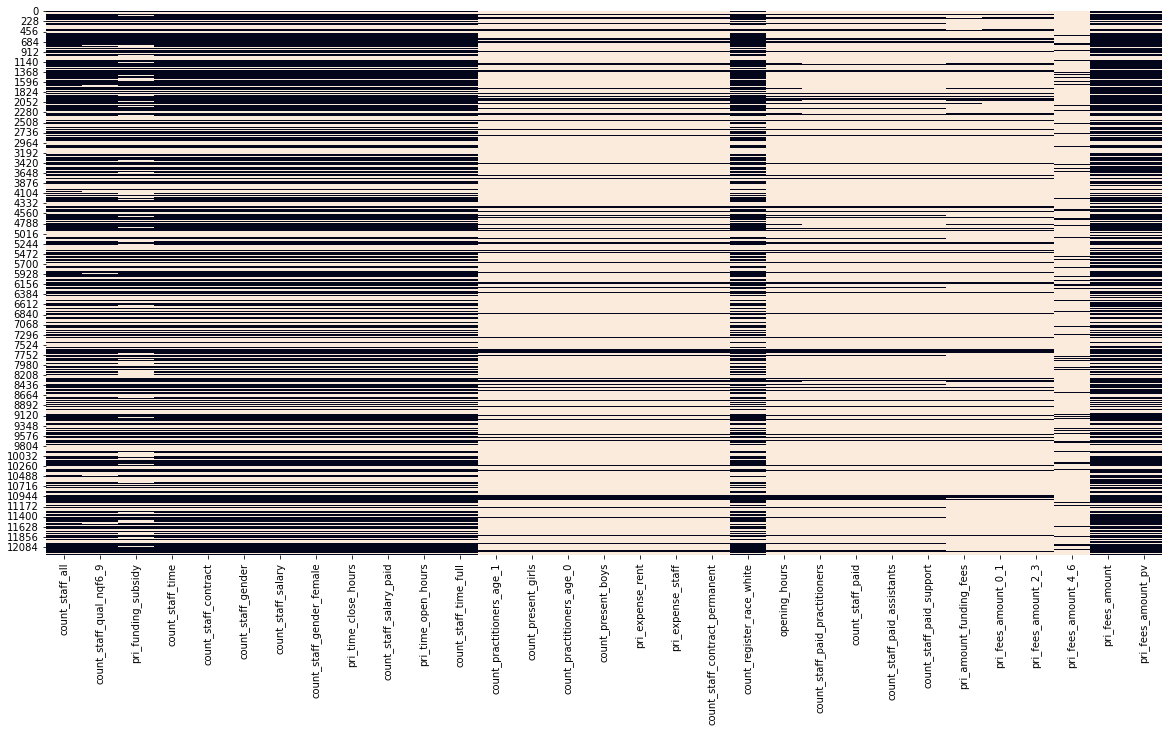

In [106]:
plt.figure(figsize=(20,10))
sns.heatmap(df[['count_staff_all',
       'count_staff_qual_nqf6_9', 'pri_funding_subsidy', 'count_staff_time',
       'count_staff_contract', 'count_staff_gender', 'count_staff_salary',
       'count_staff_gender_female', 'pri_time_close_hours',
       'count_staff_salary_paid', 'pri_time_open_hours',
       'count_staff_time_full', 'count_practitioners_age_1',
       'count_present_girls', 'count_practitioners_age_0',
       'count_present_boys', 'pri_expense_rent', 'pri_expense_staff',
       'count_staff_contract_permanent', 'count_register_race_white',
       'opening_hours', 'count_staff_paid_practitioners', 'count_staff_paid',
       'count_staff_paid_assistants', 'count_staff_paid_support',
       'pri_amount_funding_fees', 'pri_fees_amount_0_1', 'pri_fees_amount_2_3',
       'pri_fees_amount_4_6', 'pri_fees_amount', 'pri_fees_amount_pv']].isna(),cbar=False)

In [107]:
df_encoded.pri_fees_amount_pv[df_encoded.pri_fees_amount_pv.isna()]#nan

0       NaN
1       NaN
5       NaN
6       NaN
8       NaN
         ..
12247   NaN
12248   NaN
12249   NaN
12258   NaN
12260   NaN
Name: pri_fees_amount_pv, Length: 4161, dtype: float64

## <span style="color:red">Pridection of 'pri_fees_amount_pv'</span>

In [108]:
df_encoded.pri_fees_amount_pv=df.pri_fees_amount_pv

In [109]:
df_train = df_encoded.drop(['target'],axis=1).select_dtypes('number')[df_encoded.pri_fees_amount_pv.notna()]
df_train.fillna(0,inplace=True)

df_pred= df_encoded.drop(['target','pri_fees_amount_pv'],axis=1).select_dtypes('number')[df_encoded.pri_fees_amount_pv.isna()]
df_pred.fillna(0,inplace=True)

In [110]:
X=df_train.drop(['pri_fees_amount_pv'],axis=1)
y=df_train['pri_fees_amount_pv']
X_t,X_p,y_t,y_p=train_test_split(X,y,test_size=0.15,random_state=0)

from sklearn.linear_model import Ridge
modd=Ridge(alpha=0.2)
mod=LinearRegression()
mod.fit(X_t,y_t)

LinearRegression()

In [111]:
from sklearn.metrics import classification_report
cc=mod.predict(X_p)

In [112]:
mean_squared_error(cc,y_p)

5.082478433416172

In [113]:
cc

array([1.38781880e+03, 1.92163336e+02, 4.49825673e+02, ...,
       5.74372219e+01, 2.73299565e+03, 3.73487425e-03])

In [114]:
df_encoded.pri_fees_amount_pv[df_encoded.pri_fees_amount_pv.isna()]=(mod.predict(df_pred)*8).round(2)#(mod.predict(df_pred)*8).round(2)

In [115]:
df_encoded.pri_fees_amount_pv

0       -284.610000
1       -147.790000
2          0.000000
3        373.650450
4        106.757270
            ...    
12260   -391.490000
12261    587.165000
12262     53.378635
12263    213.514540
12264     16.013590
Name: pri_fees_amount_pv, Length: 12265, dtype: float64

In [116]:
df.select_dtypes('float')

,data_year,child_age,child_months_enrolment,child_years_in_programme,child_height,child_observe_total,child_zha,child_attendance,ward_best,pqa_class_assistants,pqa_score_environment,pqa_score_assessment,pqa_score_relationships,pqa_score_curriculum,pqa_score_teaching,pra_experience,pra_class_present,pra_class_size,pra_class_attendance,pra_class_attendance_precovid,pra_hhsize,pra_measure_rectangle_length,pra_measure_rectangle_width,pra_class_space,pri_days,pri_time_open_hours,pri_time_open_minutes,pri_time_close_hours,pri_time_close_minutes,pri_year,pri_fees_amount,pri_dsd_year,pri_capacity,pri_amount_funding_dsd,pri_amount_funding_fees,pri_children_4_6_years,pri_difficult_see,pri_difficult_hear,pri_difficult_walk,pri_difficult_hold,pri_difficult_communicate,pri_difficult_learn,pri_covid_staff_retrench,pri_fees_amount_0_1,pri_fees_amount_2_3,pri_expense_food,pri_expense_staff,pri_expense_rent,pri_expense_materials,pri_expense_maintenance,pri_expense_admin,pri_expense_other,pri_clinic_time,pri_fees_amount_4_6,pri_fees_amount_pv,...,count_staff_contract,count_staff_time_full,count_staff_time,count_staff_qual_skills,count_staff_qual_nqf4_5,count_staff_qual_nqf6_9,count_toilets_children,count_toilets_adults,quintile,opening_hours,count_register_foreign,count_present_girls,count_present_boys,count_staff_contract_permanent,count_staff_contract_temporary,count_staff_contract_substitute,count_staff_time_part,count_staff_paid_practitioners,count_staff_paid_assistants,count_staff_paid_cooks,count_staff_paid_maintenance,count_staff_paid_managers,count_staff_paid_support,count_staff_paid,count_practitioners_all,count_practitioners_age_0,count_practitioners_age_1,count_practitioners_age_2,count_practitioners_age_3,count_practitioners_age_4,count_practitioners_age_5,count_practitioners_age_6,language_match,ses_proxy,obs_lighting_1,obs_lighting_2,obs_lighting_3,obs_lighting_4,obs_lighting_5,obs_lighting_6,obs_lighting_8,obs_cooking_1,obs_cooking_2,obs_cooking_3,obs_cooking_4,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target
0,2022.0,59.000000,NaN,NaN,NaN,4.0,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.500000
1,2019.0,60.163933,NaN,1.0,103.000000,4.0,-1.356791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.869999
2,2022.0,69.000000,NaN,NaN,108.400002,7.0,-1.250863,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.520000
3,2021.0,53.000000,20.0,1.0,98.099998,9.0,-1.830364,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,0.0,17.0,0.0,2014.0,350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.650450,...,5.0,4.0,5.0,0.0,1.0,1.0,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [117]:
df_encoded['gps_ind']

0        Yes
1         No
2        Yes
3        Yes
4        Yes
        ... 
12260    Yes
12261    Yes
12262    Yes
12263    Yes
12264    Yes
Name: gps_ind, Length: 12265, dtype: object

In [118]:
scapper={'Yes':10,'No':0}

In [119]:
df_encoded['gps_ind']  = df_encoded['gps_ind'].replace(scapper)

In [120]:
aux = df_encoded.gps
df_encoded.gps=df_encoded['gps_ind']
df_encoded['gps_ind'] = aux

In [121]:
df_encoded.latitude

0       -26.551048
1              NaN
2              NaN
3       -33.664103
4       -29.457600
           ...    
12260   -25.962204
12261   -33.782218
12262   -28.896010
12263   -25.132220
12264   -34.007719
Name: latitude, Length: 12265, dtype: float64

    -mean_squared_error_test : 9.718480016648005
    -mean_squared_error_train : 9.162075878516038


--------

In [122]:
df_train = df_encoded.iloc[:8584+1]
df_pred = df_encoded.iloc[8584+1:]
df_pred.reset_index(drop=True, inplace=True)

df_train_corr=abs(df_train.corr()['target'][:]).sort_values(ascending=False)

top_features = df_train_corr[df_train_corr>0.3]

top_features

VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVv
- target                        1.000000
- child_observe_total           0.444812
- child_age                     0.424989
- child_observe_diligent        0.411056
- child_observe_interested      0.397753
- child_observe_attentive       0.390925
- child_observe_concentrated    0.372145

In [123]:
top_features=['child_observe_total', 'child_age', 'child_observe_diligent',
       'child_observe_interested', 'child_observe_attentive',
       'child_observe_concentrated']

In [124]:
df_encoded[top_features]

,child_observe_total,child_age,child_observe_diligent,child_observe_interested,child_observe_attentive,child_observe_concentrated
0,4.0,59.000000,3,3,3,3
1,4.0,60.163933,3,5,3,0
2,7.0,69.000000,3,5,5,5
3,9.0,53.000000,3,5,10,10
4,12.0,57.000000,10,10,10,10
...,...,...,...,...,...,...
12260,8.0,67.318275,3,10,5,5
12261,4.0,64.000000,3,3,3,3
12262,12.0,59.000000,10,10,10,10
12263,2.0,52.000000,0,0,3,3


## Polynomial feats use wasnt promessing 

In [125]:
df_encoded[df_encoded.columns[df_encoded.columns.str.startswith('count')]]
df

,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_score_environment,pqa_score_assessment,pqa_score_relationships,pqa_score_curriculum,pqa_score_teaching,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,...,count_staff_contract_permanent,count_staff_contract_temporary,count_staff_contract_substitute,count_staff_time_part,count_staff_paid_practitioners,count_staff_paid_assistants,count_staff_paid_cooks,count_staff_paid_maintenance,count_staff_paid_managers,count_staff_paid_support,count_staff_paid,count_practitioners_all,count_practitioners_age_0,count_practitioners_age_1,count_practitioners_age_2,count_practitioners_age_3,count_practitioners_age_4,count_practitioners_age_5,count_practitioners_age_6,health,practitioner,plan,language_child,language_assessment,facility_type,sef_ind,language_match,elp_ind,gps_ind,pre_covid,ses_proxy,quintile_used,ses_cat,obs_lighting_1,obs_lighting_2,obs_lighting_3,obs_lighting_4,obs_lighting_5,obs_lighting_6,obs_lighting_8,obs_cooking_1,obs_cooking_2,obs_cooking_3,obs_cooking_4,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target,pqa_total
0,2022.0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,3,3,3,3,4.0,Female,2017-02-06,NaN,NaN,NaN,NaN,NaN,50-59 months,GT421,GAUTENG,DC42,SEDIBENG,EMFULENI,39.0,20005.0,761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sesotho,Sesotho,Grade R,Yes,1.0,No,Yes,Post COVID,2.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.500000,15
1,2019.0,NaN,60.163933,NaN,NaN,NaN,1.0,103.000000,3,0,3,5,4.0,Female,NaN,-1.356791,Normal,NaN,NaN,NaN,60-69 months,nan,KWAZULU-NATAL,DC22,UMGUNGUNDLOVU,NaN,NaN,nan,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isiZulu,isiZulu,NaN,Yes,1.0,No,No,Pre-COVID,4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.869999,13
2,2022.0,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,5,5,3,5,7.0,Male,2016-05-24,-1.250863,Normal,NaN,NaN,NaN,60-69 months,CPT,WESTERN CAPE,CPT,CITY OF CAPE TOWN,CITY OF CAPE TOWN,85.0,20001.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afrikaans,Afrikaans,Grade R,No,1.0,Yes,Yes,Post COVID,1.0,No,R0-110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.520000,11
3,2021.0,2021-10-13,53.000000,2020-01-15,20.0,No,1.0,98.099998,10,10,3,5,9.0,Male,2017-05-08,-1.830364,Normal,NaN,NaN,NaN,50-59 months,WC025,WESTERN CAPE,DC2,CAPE WINELANDS,BREEDE VALLEY,18.0,2689.0,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up to 1 hour,Up to 1 hour,4 5,No,No,No,Yes,Yes,Sometime,Practitioner,Both,Both,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isiXhosa,isiXhosa,NaN,Yes,1.0,Yes,Yes,Post COVID,3.0,No,R291-750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [126]:
cols_count_year = df_encoded.columns[df_encoded.columns.str.startswith('count_register_year').tolist()]

In [127]:
drops = cols_count_year

**After dropping cols with startswith('count_register_year')*
- #mean_squared_error_test : 9.702028913584995
- #mean_squared_error_train : 9.100120876290196
------------------
--------------
-----------------
----------
----
### <span style="color:red">Further feature engineering</span>

In [128]:
df_encoded_2=df_encoded.copy()

In [129]:
df_encoded_2[['id_facility_837.0',
'id_enumerator_20079.0','target']].corr()['target'][:]

id_facility_837.0       -0.047367
id_enumerator_20079.0   -0.036771
target                   1.000000
Name: target, dtype: float64

In [130]:
df_encoded_2['prod']= df_encoded_2['id_facility_837.0'] + df_encoded_2['id_enumerator_2795.0']
df_encoded_2['prod'].value_counts()


0    12163
1      102
Name: prod, dtype: int64

df_encoded=df_encoded_2.copy()

----
best perf till here without dropping additionnal comluns other than drops
- mean_squared_error_test : 9.710520995370121
- mean_squared_error_train : 9.144544518205505
cv=10

--------
---------

In [131]:
df_encoded

,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,prov_best,dc_best,mn_best,ward_best,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_score_environment,pqa_score_assessment,pqa_score_relationships,pqa_score_curriculum,pqa_score_teaching,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,...,id_ward_93505030.0,id_ward_93601004.0,id_ward_93601005.0,id_ward_93601007.0,id_ward_93601008.0,id_ward_93601009.0,id_ward_93601010.0,id_ward_93602013.0,id_ward_93607005.0,id_ward_93607013.0,id_ward_93607016.0,id_ward_93607018.0,id_ward_94701001.0,id_ward_94701014.0,id_ward_94702029.0,id_ward_94703025.0,id_ward_94706008.0,id_ward_94706014.0,id_ward_94706019.0,id_ward_94706020.0,id_ward_94706025.0,id_ward_nan,id_prov_EC,id_prov_FS,id_prov_GT,id_prov_KZN,id_prov_LIM,id_prov_MP,id_prov_NC,id_prov_NW,id_prov_WC,id_prov_nan,id_team_1.0,id_team_10.0,id_team_11.0,id_team_12.0,id_team_13.0,id_team_14.0,id_team_15.0,id_team_16.0,id_team_17.0,id_team_18.0,id_team_2.0,id_team_3.0,id_team_4.0,id_team_5.0,id_team_6.0,id_team_7.0,id_team_8.0,id_team_9.0,id_team_nan,2019,2020,2021,2022
0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,3,3,3,3,4.0,Female,2017.0,NaN,NaN,NaN,NaN,NaN,50-59 months,GAUTENG,SEDIBENG,EMFULENI,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,NaN,60.163933,NaN,NaN,NaN,1.0,103.000000,3,0,3,5,4.0,Female,2016.0,-1.356791,0.0,NaN,NaN,NaN,60-69 months,KWAZULU-NATAL,UMGUNGUNDLOVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,5,5,3,5,7.0,Male,2016.0,-1.250863,0.0,NaN,NaN,NaN,60-69 months,WESTERN CAPE,CITY OF CAPE TOWN,CITY OF CAPE TOWN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2021-10-13,53.000000,2020.0,20.0,No,1.0,98.099998,10,10,3,5,9.0,Male,2017.0,-1.830364,0.0,NaN,NaN,NaN,50-59 months,WESTERN CAPE,CAPE WINELANDS,BREEDE VALLEY,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up to 1 hour,Up to 1 hour,4 5,No,No,No,Yes,Yes,Sometime,Practitioner,Both,Both,Both,Both,Both,Both,1 3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2021-10-13,57.000000,2021.0,0.0,NaN,2.0,114.000000,10,10,10,10,12.0,Female,2016.0,1.329264,0.0,NaN,NaN,NaN,50-59 months,KWAZULU-NATAL,ILEMBE,NDWEDWE,10.0,2021-10-29,4 5,No,No,No,Yes,Yes,No,0.0,6.0,2.0,4.0,5.0,5.0,30 minutes or less,30 minutes or less,1 2 3 4 5,Yes,Yes,Yes,Yes,Yes,Sometime,Both,Both,Both,Both,Practitioner,Both,Both,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [132]:
df_encoded_2['child_date_year']=df_encoded.child_date[df_encoded.child_date.notna()].map(lambda x: str(x)[:4])

In [133]:
df_encoded_2['child_date_month']=df_encoded.child_date[df_encoded.child_date.notna()].map(lambda x: str(x)[5:7] if int(str(x)[5:7])>=10 else str(x)[6:7] )

In [134]:
df_encoded_2.drop(['child_date_month'],axis=1,inplace=True)

In [135]:
df_encoded

,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,prov_best,dc_best,mn_best,ward_best,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_score_environment,pqa_score_assessment,pqa_score_relationships,pqa_score_curriculum,pqa_score_teaching,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,...,id_ward_93505030.0,id_ward_93601004.0,id_ward_93601005.0,id_ward_93601007.0,id_ward_93601008.0,id_ward_93601009.0,id_ward_93601010.0,id_ward_93602013.0,id_ward_93607005.0,id_ward_93607013.0,id_ward_93607016.0,id_ward_93607018.0,id_ward_94701001.0,id_ward_94701014.0,id_ward_94702029.0,id_ward_94703025.0,id_ward_94706008.0,id_ward_94706014.0,id_ward_94706019.0,id_ward_94706020.0,id_ward_94706025.0,id_ward_nan,id_prov_EC,id_prov_FS,id_prov_GT,id_prov_KZN,id_prov_LIM,id_prov_MP,id_prov_NC,id_prov_NW,id_prov_WC,id_prov_nan,id_team_1.0,id_team_10.0,id_team_11.0,id_team_12.0,id_team_13.0,id_team_14.0,id_team_15.0,id_team_16.0,id_team_17.0,id_team_18.0,id_team_2.0,id_team_3.0,id_team_4.0,id_team_5.0,id_team_6.0,id_team_7.0,id_team_8.0,id_team_9.0,id_team_nan,2019,2020,2021,2022
0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,3,3,3,3,4.0,Female,2017.0,NaN,NaN,NaN,NaN,NaN,50-59 months,GAUTENG,SEDIBENG,EMFULENI,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,NaN,60.163933,NaN,NaN,NaN,1.0,103.000000,3,0,3,5,4.0,Female,2016.0,-1.356791,0.0,NaN,NaN,NaN,60-69 months,KWAZULU-NATAL,UMGUNGUNDLOVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,5,5,3,5,7.0,Male,2016.0,-1.250863,0.0,NaN,NaN,NaN,60-69 months,WESTERN CAPE,CITY OF CAPE TOWN,CITY OF CAPE TOWN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2021-10-13,53.000000,2020.0,20.0,No,1.0,98.099998,10,10,3,5,9.0,Male,2017.0,-1.830364,0.0,NaN,NaN,NaN,50-59 months,WESTERN CAPE,CAPE WINELANDS,BREEDE VALLEY,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up to 1 hour,Up to 1 hour,4 5,No,No,No,Yes,Yes,Sometime,Practitioner,Both,Both,Both,Both,Both,Both,1 3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2021-10-13,57.000000,2021.0,0.0,NaN,2.0,114.000000,10,10,10,10,12.0,Female,2016.0,1.329264,0.0,NaN,NaN,NaN,50-59 months,KWAZULU-NATAL,ILEMBE,NDWEDWE,10.0,2021-10-29,4 5,No,No,No,Yes,Yes,No,0.0,6.0,2.0,4.0,5.0,5.0,30 minutes or less,30 minutes or less,1 2 3 4 5,Yes,Yes,Yes,Yes,Yes,Sometime,Both,Both,Both,Both,Practitioner,Both,Both,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Watch out for performance

In [136]:
df_encoded['obs_access_disability'].value_counts()

0              756
4 5 6          412
5 6            187
6              173
3 4 5 6        163
4 5            140
5               69
4 6             62
1 3 4 5 6       49
3 5 6           40
1 2 3 4 5 6     33
1               27
1 4 5           24
1 4 5 6         24
4               17
1 3 5 6         16
2 3 4 5 6       13
1 2 4 5 6       13
1 3 4 6         12
1 5 6           11
3 6              8
1 2 3 4          8
1 3 4 5          8
1 3 5            8
2 6              8
2                8
1 5              7
3 5              7
1 2 4            6
3 4 5            6
1 4 6            6
3 4 6            6
1 4              4
1 6              4
2 4              3
3 4              3
1 2 6            2
Name: obs_access_disability, dtype: int64

In [137]:
df_encoded_2=df_encoded.copy()

In [138]:
counting_cols=['pra_plan_5yrs','pra_plan_4yrs','pra_plans','pra_qualification','pra_training','pri_clinic_travel'
               ,'pri_covid_awareness','pri_covid_precautions',
              'pri_food_type','pri_language','pri_meal',
              'pri_network_type','pri_qualification','pri_records','pri_support_provider','pqa_class_age'
              ,'obs_toilet','obs_materials','obs_hazard','obs_handwashing','obs_access_disability','obs_area']
for col in  counting_cols:
    df_encoded_2[col] = df_encoded_2[col].apply(lambda x: len(str(x).split(' ')) if not pd.isna(x) else 0)
for col in ['pri_money','obs_equipment']:
    df_encoded_2[col] = df_encoded_2[col].apply(lambda x: len(str(x).split(' ')) if (not pd.isna(x))and(x!=-1) else 0)

In [139]:
df_encoded_2.drop(['obs_cooking','obs_heating','obs_lighting'],axis=1,inplace=True)

In [140]:
df_encoded_2['Valeur_ajoute']=df_encoded_2[counting_cols].sum(axis=1)*10

In [141]:
#df_encoded_2.drop(counting_cols,axis=1,inplace=True)

In [142]:
#df_encoded_2[counting_cols]=df_encoded[counting_cols]

In [143]:
df_encoded_2[top_features]

,child_observe_total,child_age,child_observe_diligent,child_observe_interested,child_observe_attentive,child_observe_concentrated
0,4.0,59.000000,3,3,3,3
1,4.0,60.163933,3,5,3,0
2,7.0,69.000000,3,5,5,5
3,9.0,53.000000,3,5,10,10
4,12.0,57.000000,10,10,10,10
...,...,...,...,...,...,...
12260,8.0,67.318275,3,10,5,5
12261,4.0,64.000000,3,3,3,3
12262,12.0,59.000000,10,10,10,10
12263,2.0,52.000000,0,0,3,3


In [144]:
df_encoded_2['ovserve_va']=df_encoded_2['child_observe_total']*df_encoded_2['child_observe_total']

df_encoded_2['ovserve_va_sum']=df_encoded_2['child_observe_total']+df_encoded_2['child_observe_total']

In [145]:
df_encoded_2['ovserve_dil']=df_encoded_2['child_observe_diligent']*df_encoded_2['child_observe_diligent']

df_encoded_2['ovserve_dil_sum']=df_encoded_2['child_observe_diligent']+df_encoded_2['child_observe_diligent']

In [146]:
df_encoded_2['ovserve_int']=df_encoded_2['child_observe_interested']*df_encoded_2['child_observe_interested']

df_encoded_2['ovserve_int_sum']=df_encoded_2['child_observe_interested']+df_encoded_2['child_observe_interested']

In [147]:
df_encoded_2['ovserve_att']=df_encoded_2['child_observe_attentive']*df_encoded_2['child_observe_attentive']

df_encoded_2['ovserve_att_sum']=df_encoded_2['child_observe_attentive']+df_encoded_2['child_observe_attentive']

In [148]:
df_encoded_2['ovserve_con']=df_encoded_2['child_observe_concentrated']*df_encoded_2['child_observe_concentrated']

df_encoded_2['ovserve_va_con']=df_encoded_2['child_observe_concentrated']+df_encoded_2['child_observe_concentrated']

In [149]:
df_encoded_2[df_encoded_2.columns[df_encoded_2.columns.str.startswith('ovserve_').tolist()]]

,ovserve_va,ovserve_va_sum,ovserve_dil,ovserve_dil_sum,ovserve_int,ovserve_int_sum,ovserve_att,ovserve_att_sum,ovserve_con,ovserve_va_con
0,16.0,8.0,9,6,9,6,9,6,9,6
1,16.0,8.0,9,6,25,10,9,6,0,0
2,49.0,14.0,9,6,25,10,25,10,25,10
3,81.0,18.0,9,6,25,10,100,20,100,20
4,144.0,24.0,100,20,100,20,100,20,100,20
...,...,...,...,...,...,...,...,...,...,...
12260,64.0,16.0,9,6,100,20,25,10,25,10
12261,16.0,8.0,9,6,9,6,9,6,9,6
12262,144.0,24.0,100,20,100,20,100,20,100,20
12263,4.0,4.0,0,0,0,0,9,6,9,6


In [150]:
l=df_encoded_2.columns[df_encoded_2.columns.str.startswith('ovserve_').tolist()].tolist()

In [151]:
df_encoded_2['obveserve_sum_mass']=df_encoded_2[df_encoded_2.columns[df_encoded_2.columns.str.startswith('ovserve_').tolist()]].sum(axis=1)

In [152]:
df_encoded_2['obveserve_sum_mass']

0         84.0
1         89.0
2        183.0
3        389.0
4        648.0
         ...  
12260    285.0
12261     84.0
12262    648.0
12263     38.0
12264     18.0
Name: obveserve_sum_mass, Length: 12265, dtype: float64

In [153]:
i=0
for col in range(1,len(l)):
    df_encoded_2[f'obveserve_sum_mass{col}']=df_encoded_2[l[col-1]]*df_encoded_2[l[col]]

In [154]:
df_encoded_2

,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,prov_best,dc_best,mn_best,ward_best,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_score_environment,pqa_score_assessment,pqa_score_relationships,pqa_score_curriculum,pqa_score_teaching,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,...,id_ward_nan,id_prov_EC,id_prov_FS,id_prov_GT,id_prov_KZN,id_prov_LIM,id_prov_MP,id_prov_NC,id_prov_NW,id_prov_WC,id_prov_nan,id_team_1.0,id_team_10.0,id_team_11.0,id_team_12.0,id_team_13.0,id_team_14.0,id_team_15.0,id_team_16.0,id_team_17.0,id_team_18.0,id_team_2.0,id_team_3.0,id_team_4.0,id_team_5.0,id_team_6.0,id_team_7.0,id_team_8.0,id_team_9.0,id_team_nan,2019,2020,2021,2022,Valeur_ajoute,ovserve_va,ovserve_va_sum,ovserve_dil,ovserve_dil_sum,ovserve_int,ovserve_int_sum,ovserve_att,ovserve_att_sum,ovserve_con,ovserve_va_con,obveserve_sum_mass,obveserve_sum_mass1,obveserve_sum_mass2,obveserve_sum_mass3,obveserve_sum_mass4,obveserve_sum_mass5,obveserve_sum_mass6,obveserve_sum_mass7,obveserve_sum_mass8,obveserve_sum_mass9
0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,3,3,3,3,4.0,Female,2017.0,NaN,NaN,NaN,NaN,NaN,50-59 months,GAUTENG,SEDIBENG,EMFULENI,39.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,16.0,8.0,9,6,9,6,9,6,9,6,84.0,128.0,72.0,54,54,54,54,54,54,54
1,NaN,60.163933,NaN,NaN,NaN,1.0,103.000000,3,0,3,5,4.0,Female,2016.0,-1.356791,0.0,NaN,NaN,NaN,60-69 months,KWAZULU-NATAL,UMGUNGUNDLOVU,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,16.0,8.0,9,6,25,10,9,6,0,0,89.0,128.0,72.0,54,150,250,90,54,0,0
2,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,5,5,3,5,7.0,Male,2016.0,-1.250863,0.0,NaN,NaN,NaN,60-69 months,WESTERN CAPE,CITY OF CAPE TOWN,CITY OF CAPE TOWN,85.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,49.0,14.0,9,6,25,10,25,10,25,10,183.0,686.0,126.0,54,150,250,250,250,250,250
3,2021-10-13,53.000000,2020.0,20.0,No,1.0,98.099998,10,10,3,5,9.0,Male,2017.0,-1.830364,0.0,NaN,NaN,NaN,50-59 months,WESTERN CAPE,CAPE WINELANDS,BREEDE VALLEY,18.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up to 1 hour,Up to 1 hour,4 5,No,No,No,Yes,Yes,Sometime,Practitioner,Both,Both,Both,Both,Both,Both,2,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,240,81.0,18.0,9,6,25,10,100,20,100,20,389.0,1458.0,162.0,54,150,250,1000,2000,2000,2000
4,2021-10-13,57.000000,2021.0,0.0,NaN,2.0,114.000000,10,10,10,10,12.0,Female,2016.0,1.329264,0.0,NaN,NaN,NaN,50-59 months,KWAZULU-NATAL,ILEMBE,NDWEDWE,10.0,2021-10-29,2,No,No,No,Yes,Yes,No,0.0,6.0,2.0,4.0,5.0,5.0,30 minutes or less,30 minutes or less,1 2 3 4 5,Yes,Yes,Yes,Yes,Yes,Sometime,Both,Both,Both,Both,Practitioner,Both,Both,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,540,144.0,24.0,100,20,100,20,100,20,100,20,648.0,3456.0,2400.0,2000,2000,2000,2000,2000,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [155]:
for col in range(1,len(l)):
    df_encoded_2[f'obveserve_sum_mass{col+10}']=(df_encoded_2[l[col]]-df_encoded_2[l[col-1]])*df_encoded_2['pri_fees_amount_pv']

In [156]:
print(df_encoded.select_dtypes('float').columns[(df_encoded.select_dtypes('float').isna().sum()/df_encoded.shape[0])<0.1])

Index(['child_age', 'child_years_in_programme', 'child_observe_total',
       'child_dob', 'pri_fees_amount_pv', 'gps', 'quintile', 'language_match',
       'ses_proxy'],
      dtype='object')


In [157]:
for col in range(2,len(l)):
    df_encoded_2[f'obveserve_sum_mass{col+100}']=np.sqrt(df_encoded_2[l[col]]+df_encoded_2[l[col-1]]+df_encoded_2[l[col-2]])

In [158]:
for col in range(2,len(l)):
    df_encoded_2[f'obveserve_sum_mass{col+1000}']=np.abs(df_encoded_2[l[col]]*df_encoded_2[l[col-1]]*df_encoded_2[l[col-2]])

In [160]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df_encoded_2[df_encoded_2.columns[df_encoded_2.columns.str.startswith('teacher')].tolist()[0]])

array([4, 4, 2, ..., 4, 0, 4])

In [161]:
df_encoded_6=df_encoded_2.copy()

In [162]:
df_encoded_2['teacher_overall']=np.zeros((df_encoded.shape[0],1))
for col in df_encoded_2.columns[df_encoded_2.columns.str.startswith('teacher')].tolist():
                df_encoded_2['teacher_overall']=df_encoded_2['teacher_overall']+le.fit_transform(df_encoded_2[col])
                        

In [163]:

df_encoded_2['teacher_overall']

0         101.0
1        1190.0
2        1156.0
3        1156.0
4        1168.0
          ...  
12260    1235.0
12261     101.0
12262    1235.0
12263    1132.0
12264     101.0
Name: teacher_overall, Length: 12265, dtype: float64

In [164]:
#df_encoded_2.drop(['pqa_score_overall_100'],axis=1,inplace=True)

In [165]:
scapper={'Yes':10,'No':0.,np.nan:0}
df_encoded_2.professionals_practitioners=df_encoded_2.professionals_practitioners.replace(scapper)

In [166]:
df_encoded_2.pra_salary.value_counts()

R1500 – R1999               437
R2000 – R2499               407
R1000 – R1249               284
R2500 – R2999               192
R3000 – R3499               170
R500 – R749                 153
R750 – R999                 138
R1250 – R1499               122
R4000 – R4449                98
R 5000 – R5999               71
More than R6000              67
R0                           62
Less than R500 per month     56
R3500 – R3999                40
Name: pra_salary, dtype: int64

In [167]:
scraper_s={
    'More than R6000': 20,
    'R 5000 – R5999': 18,
    'R4000 – R4449': 15,
    'R3000 – R3499': 12,
    'R3500 – R3999': 12,
    'R2000 – R2499': 10,
    'R2500 – R2999': 10,
    'R1500 – R1999': 7,
    'R1250 – R1499': 7,
    'R1000 – R1249': 7,
    'R750 – R999': 5,
    'R500 – R749': 5,
    np.nan: 2,
    'Less than R500 per month': 2,
    'R0': 2
}



In [168]:
df_encoded_2['pra_salary']=df_encoded_2['pra_salary'].replace(scraper_s)

In [169]:
df_encoded_2.pra_ind

0         No
1         No
2         No
3        Yes
4        Yes
        ... 
12260    NaN
12261    Yes
12262    Yes
12263    Yes
12264    Yes
Name: pra_ind, Length: 12265, dtype: object

In [170]:
df_encoded_2.pra_class_space.value_counts()



42.000000     131
56.000000     130
36.000000     126
63.000000     122
64.000000     118
20.000000     110
30.000000     108
35.000000     108
25.000000     105
24.000000      93
49.000000      88
16.000000      75
72.000000      75
70.000000      67
54.000000      65
45.000000      60
15.000000      59
32.000000      52
48.000000      52
12.000000      51
40.000000      46
80.000000      39
60.000000      38
18.000000      38
28.000000      38
21.000000      28
10.000000      24
66.000000      19
81.000000      17
96.000000      15
120.000000     15
78.000000      15
84.000000      14
9.000000       13
77.000000      12
100.000000     12
26.000000      12
90.000000      12
27.000000      11
50.000000      10
135.000000      9
55.000000       8
143.000000      8
110.000000      7
144.000000      5
140.000000      5
17.278759       4
58.000000       4
180.000000      4
14.137167       4
65.000000       4
75.000000       4
46.000000       4
108.000000      4
38.000000       4
12.566371 

In [171]:

df_encoded_2['pra_groupings'] = df_encoded_2['pra_groupings'].apply(lambda x: len(str(x).split(' ')) if not pd.isna(x) else 0)

In [172]:
df_encoded_2['pra_cohort'] = df_encoded_2['pra_cohort'].apply(lambda x: len(str(x).split(' ')) if not pd.isna(x) else 0)

In [173]:
df_encoded_2['class_size']=df_encoded_2.pra_class_space.apply(lambda x: 10 if x>=100 else (5 if x>=50 else 2))

In [174]:
df_encoded_2['pra_class_size'].value_counts()

15.0    174
20.0    165
18.0    144
25.0    131
28.0     96
23.0     90
22.0     88
16.0     85
21.0     83
17.0     80
30.0     75
24.0     75
13.0     71
26.0     71
19.0     67
34.0     65
27.0     63
12.0     58
14.0     57
32.0     52
41.0     45
31.0     44
35.0     38
10.0     35
37.0     32
29.0     29
11.0     29
36.0     26
9.0      25
33.0     25
8.0      25
7.0      23
45.0     22
46.0     19
40.0     18
38.0     17
47.0     16
43.0     14
6.0      13
53.0      8
54.0      8
49.0      7
60.0      5
63.0      4
44.0      4
59.0      4
62.0      4
48.0      4
65.0      4
42.0      4
58.0      4
5.0       3
39.0      2
Name: pra_class_size, dtype: int64

In [175]:
df_encoded_2['nb_children_per_class_effect']=df_encoded_2['pra_class_size'].apply(lambda x: 0 if x > 30 else (1 if (x > 20 or x < 15) else (1 if x in range(15, 21) else 0)))

In [176]:
df_encoded_2['nb_children_per_class_effect'].value_counts()

0    10410
1     1855
Name: nb_children_per_class_effect, dtype: int64

In [177]:
df_encoded_2[df_encoded_2.columns[df_encoded_2.columns.str.startswith('pqa_score')]].sum(axis=1)

0         0.0
1         0.0
2         0.0
3         0.0
4        22.0
         ... 
12260     0.0
12261     0.0
12262    19.0
12263    32.0
12264     0.0
Length: 12265, dtype: float64

In [178]:
df_encoded_2['pqa_score_overall']=df_encoded_2[df_encoded_2.columns[df_encoded_2.columns.str.startswith('pqa_score')]].sum(axis=1)*10

In [179]:
df_encoded_2['pqa_score_overall_2']=df_encoded_2['pqa_score_overall']**2

In [180]:
df_encoded_2['pqa_score_overall_10']=df_encoded_2['pqa_score_overall']**10

In [181]:
df_encoded_2['obsxscore']=df_encoded_2['obveserve_sum_mass']*df_encoded_2['pqa_score_overall_2']

In [182]:
df_encoded_2[df_encoded_2.columns[df_encoded_2.columns.str.startswith('pra_mo')][0]].unique()

array([nan, 'Agree strongly', 'Agree a little', 'Disagree strongly',
       'Disagree a little'], dtype=object)

In [183]:
scaper={'Agree strongly':3, 'Agree a little':2, 'Disagree strongly':0,
       'Disagree a little':1,np.nan:0}

In [184]:
df_encoded_2[df_encoded_2.columns[df_encoded_2.columns.str.startswith('pra_mo')]]=df_encoded[df_encoded.columns[df_encoded.columns.str.startswith('pra_mo')]]

In [185]:
for col in df_encoded_2.columns[df_encoded_2.columns.str.startswith('pra_mo')]:
    df_encoded_2[col]=df_encoded_2[col].replace(scaper)

In [186]:
df_encoded_2['tea_motivation']=df_encoded_2[df_encoded_2.columns[df_encoded_2.columns.str.startswith('pra_mo')]].sum(axis=1)

In [187]:
df_encoded_2['tea_motivation']

0        0.0
1        0.0
2        0.0
3        0.0
4        8.0
        ... 
12260    0.0
12261    0.0
12262    9.0
12263    9.0
12264    0.0
Name: tea_motivation, Length: 12265, dtype: float64

In [188]:
df_encoded_2.drop(df_encoded_2.columns[df_encoded_2.columns.str.startswith('pra_mo')],axis=1,inplace=True)

In [189]:

df_encoded_2['obs_safety'] = df_encoded_2['obs_safety'].apply(lambda x: len(str(x).split(' ')) if not pd.isna(x) else 0)

In [190]:
#df_encoded_2[df_encoded_2.columns[df_encoded_2.columns.str.startswith('pqa_curriculum')]]=df_encoded[df_encoded.columns[df_encoded.columns.str.startswith('pqa_curriculum')]]

In [191]:
df_encoded_2.pra_paid.value_counts()

Yes    1496
No      792
Name: pra_paid, dtype: int64

In [192]:
scaper={'Yes':1,'No':-1,np.nan:0}

In [193]:
df_encoded_2.pra_paid=df_encoded_2.pra_paid.replace(scaper)